# Stock Price Machine Learning Project Part 1

-----------------------------------
## Historical Data Pull for Amazon

* One year's worth of data on a minute by minute basis to provide ample data points to create classes and design a model for prediction.

In [38]:
import pandas as pd
from alpaca_trade_api.rest import REST, TimeFrame
from fredapi import Fred
import yfinance as yf
import datetime
import pandas_ta as ta

# Keys
ALPACA_API_KEY = 'API Key removed'
ALPACA_API_SECRET = 'Secret Removed'
BASE_URL = 'https://api.alpaca.markets'
FRED_API_KEY = 'API Key Removed'
STOCK_SYMBOL = 'AMZN'
ADDITIONAL_SYMBOLS = ['AAPL', 'MSFT', 'GOOGL', 'META', 'WMT', 'BABA']

# Initialize the Alpaca and FRED API
api = REST(ALPACA_API_KEY, ALPACA_API_SECRET, BASE_URL)
fred = Fred(api_key=FRED_API_KEY)

# Function to fetch minute-level stock data from Alpaca
def fetch_minute_stock_data(ticker, start_date, end_date):
    all_data = pd.DataFrame()
    while start_date < end_date:
        chunk_end_date = start_date + datetime.timedelta(days=30)
        if chunk_end_date > end_date:
            chunk_end_date = end_date
        print(f'Fetching data from {start_date.strftime("%Y-%m-%d")} to {chunk_end_date.strftime("%Y-%m-%d")}')
        
        data = api.get_bars(
            ticker, 
            TimeFrame.Minute, 
            start=start_date.strftime('%Y-%m-%d'), 
            end=chunk_end_date.strftime('%Y-%m-%d'), 
            adjustment='raw',
            limit= None,
            feed='iex'
        ).df

        all_data = pd.concat([all_data, data])
        start_date = chunk_end_date

    all_data.index = pd.to_datetime(all_data.index)
    return all_data

# Fetch minute-level stock data for the main symbol
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365)
merged_df = fetch_minute_stock_data(STOCK_SYMBOL, start_date, end_date)

Fetching data from 2023-07-25 to 2023-08-24
Fetching data from 2023-08-24 to 2023-09-23
Fetching data from 2023-09-23 to 2023-10-23
Fetching data from 2023-10-23 to 2023-11-22
Fetching data from 2023-11-22 to 2023-12-22
Fetching data from 2023-12-22 to 2024-01-21
Fetching data from 2024-01-21 to 2024-02-20
Fetching data from 2024-02-20 to 2024-03-21
Fetching data from 2024-03-21 to 2024-04-20
Fetching data from 2024-04-20 to 2024-05-20
Fetching data from 2024-05-20 to 2024-06-19
Fetching data from 2024-06-19 to 2024-07-19
Fetching data from 2024-07-19 to 2024-07-24


In [39]:
df=merged_df
df.shape

(98624, 7)

-----------------------------------
### Adjusted Close Plot for Visual

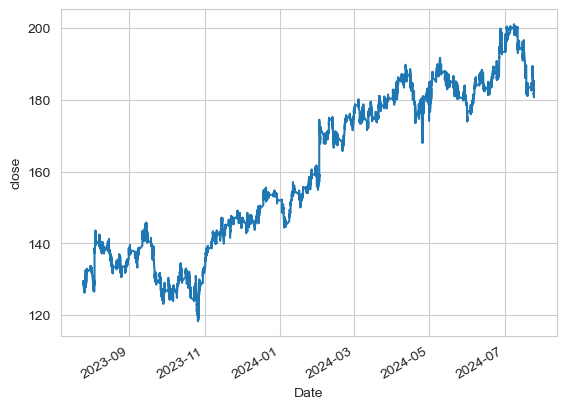

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

df['close'].plot()
plt.xlabel('Date')
plt.ylabel('close')
plt.show()

-----------------------------------
## Technical Indicator Calculations

* Pulling some info on indicator names from pandas ta.

In [42]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [43]:
# Calculate Moving Averages
df.ta.sma(length=10, append=True)
df.ta.sma(length=2, append=True)
df.ta.sma(length=5, append=True)
df.ta.sma(length=7, append=True)
df.ta.sma(length=14, append=True)
df.ta.sma(length=30, append=True)
df.ta.sma(length=50, append=True)
df.ta.sma(length=200, append=True)

# Calculate Bollinger Bands
df.ta.bbands(length=20, append=True) #volatility

# Calculate RSI
df.ta.rsi(length=14, append=True)

# Calculate MACD 
df.ta.macd(fast=12, slow=26, append=True)

print(df)

                             close     high      low  trade_count     open  \
timestamp                                                                    
2023-07-25 13:30:00+00:00  129.160  129.380  129.130           69  129.310   
2023-07-25 13:31:00+00:00  129.490  129.490  129.190           47  129.190   
2023-07-25 13:32:00+00:00  129.190  129.210  129.180           50  129.205   
2023-07-25 13:33:00+00:00  129.300  129.320  129.015           41  129.220   
2023-07-25 13:34:00+00:00  129.090  129.250  129.090           23  129.245   
...                            ...      ...      ...          ...      ...   
2024-07-24 19:55:00+00:00  180.660  180.785  180.480          114  180.590   
2024-07-24 19:56:00+00:00  180.835  180.965  180.625           84  180.625   
2024-07-24 19:57:00+00:00  180.790  180.950  180.640           73  180.895   
2024-07-24 19:58:00+00:00  180.800  180.870  180.755           88  180.840   
2024-07-24 19:59:00+00:00  180.770  181.020  180.770          13

### Good Data Pull so far with calculations 
More Technical Indicators can be added as we go. Now for some plotting to get some visuals of what the data looks like.

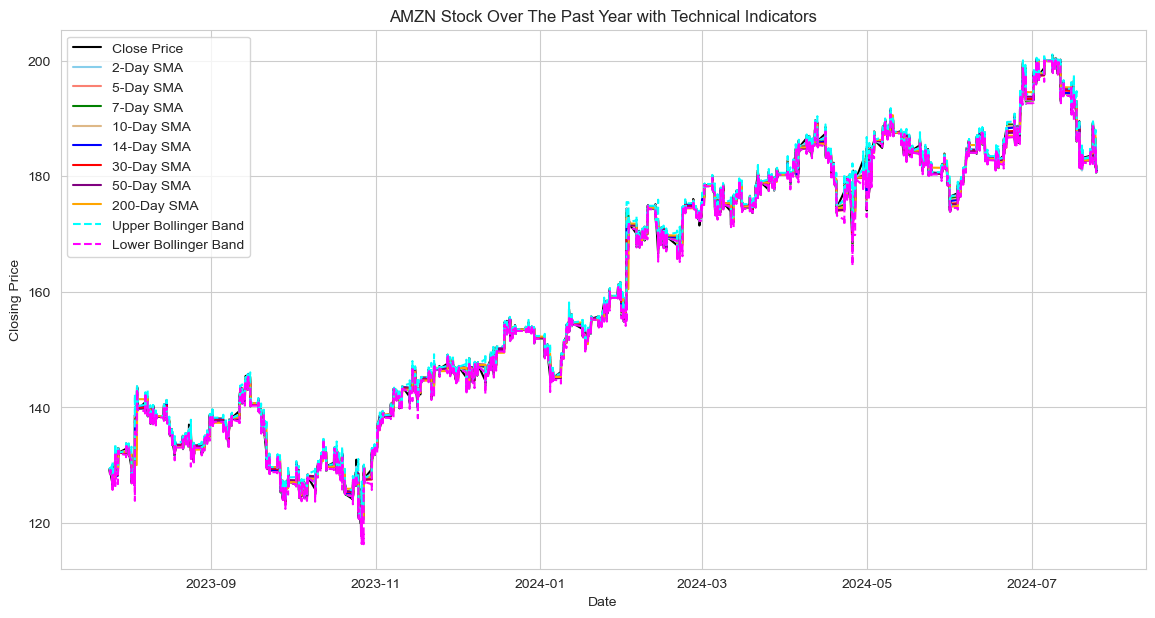

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize =(14,7))
# Moving Aveerages
plt.plot(df.index, df['close'], label = 'Close Price', color = 'black')
plt.plot(df.index,df['SMA_2'],label = '2-Day SMA', color = 'skyblue')
plt.plot(df.index,df['SMA_5'],label = '5-Day SMA', color = 'salmon')
plt.plot(df.index,df['SMA_7'],label = '7-Day SMA', color = 'green')
plt.plot(df.index,df['SMA_10'],label = '10-Day SMA', color = 'burlywood')
plt.plot(df.index, df['SMA_14'],label = '14-Day SMA',color = 'blue')
plt.plot(df.index, df['SMA_30'],label = '30-Day SMA', color = 'red')
plt.plot(df.index,df['SMA_50'], label = '50-Day SMA',color = 'purple')
plt.plot(df.index, df['SMA_200'], label = '200-Day SMA',color = 'orange')
# Bollinger Bands
plt.plot(df.index,df['BBU_20_2.0'],label = 'Upper Bollinger Band',color = 'cyan',linestyle = '--')
plt.plot(df.index,df['BBL_20_2.0'],label = 'Lower Bollinger Band',color = 'magenta',linestyle = '--')

plt.title('AMZN Stock Over The Past Year with Technical Indicators')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

### Adding some more technical indicators

In [45]:
# Full technical indicators minus other previous additions
df.ta.aberration(append=True)     # Aberration: Measures volatility
df.ta.above(above_value=160, append=True)  # Check if value is above 100
df.ta.accbands(append=True)      # Accumulation/Distribution Bands: Measure volatility
df.ta.ad(append=True)            # Accumulation/Distribution: Volume indicator
df.ta.adosc(append=True)         # Accumulation/Distribution Oscillator: Volume indicator
df.ta.adx(append=True)           # Average Directional Index: Measures trend strength
df.ta.alma(append=True)          # Arnaud Legoux Moving Average: Smoothed price data
df.ta.amat(append=True)          # Adaptative Moving Average Trend: Identifies trends
df.ta.ao(append=True)            # Awesome Oscillator: Measures momentum
df.ta.aobv(append=True)          # Above On Balance Volume: Volume indicator
df.ta.apo(append=True)           # Absolute Price Oscillator: Measures momentum
df.ta.aroon(append=True)         # Aroon: Identifies trend changes
df.ta.atr(append=True)           # Average True Range: Measures volatility
df.ta.below(below_value=50, append=True)  # Check if value is below 50
df.ta.bias(append=True)          # Bias: Measures deviation from a specified average
df.ta.bop(append=True)           # Balance of Power: Momentum indicator
df.ta.brar(append=True)          # (Bullish/Bearish) Rectangular Area: Momentum indicator
df.ta.cci(append=True)           # Commodity Channel Index: Identifies overbought/oversold conditions
df.ta.cfo(append=True)           # Chande Forecast Oscillator: Momentum indicator
df.ta.cg(append=True)            # Center of Gravity: Identifies turning points
df.ta.cmo(append=True)           # Chande Momentum Oscillator: Measures momentum
df.ta.coppock(append=True)       # Coppock Curve: Long-term momentum indicator
df.ta.cti(append=True)           # Closing Tick Indicator: Momentum indicator
df.ta.dm(append=True)           # Directional Movement: Measures trend direction
df.ta.er(append=True)           # Efficiency Ratio: Measures trend strength
df.ta.eri(append=True)          # Elder Ray Index: Combines bull and bear power
df.ta.fisher(append=True)       # Fisher Transform: Converts prices into a Gaussian normal distribution
df.ta.inertia(append=True)      # Inertia: Measures rate of change and direction
df.ta.kdj(append=True)          # Stochastic Oscillator: Measures momentum
df.ta.kst(append=True)          # Know Sure Thing (KST): Smoothed rate of change
df.ta.mom(append=True)          # Momentum: Measures rate of change in prices
df.ta.pgo(append=True)          # Percentage Price Oscillator: Measures momentum
df.ta.ppo(append=True)          # Price Percentage Oscillator: Measures momentum
df.ta.psl(append=True)          # Polarized Fractal Efficiency: Detects trends
df.ta.pvo(append=True)          # Percentage Volume Oscillator: Measures volume momentum
df.ta.qqe(append=True)          # Quantitative Qualitative Estimation: Identifies trends
df.ta.roc(append=True)          # Rate of Change: Measures momentum
df.ta.rsx(append=True)          # Relative Strength Index Smoothed: Smoothed RSI
df.ta.rvgi(append=True)          # Relative Vigor Index (RVI): Measures momentum
df.ta.slope(append=True)         # Slope: Measures the rate of change of a series
df.ta.smi(append=True)           # Stochastic Momentum Index (SMI): Measures momentum
df.ta.squeeze(append=True)       # Squeeze Momentum Indicator: Detects periods of low volatility
df.ta.squeeze_pro(append=True)   # Squeeze Pro: Enhanced version of Squeeze Momentum Indicator
df.ta.stc(append=True)           # Schaff Trend Cycle Indicator: Identifies market trends      
df.ta.stochrsi(append=True)      # Stochastic RSI: Combination of Stochastic Oscillator and RSI
df.ta.td_seq(append=True)        # TD Sequential: Detects trend exhaustion
df.ta.trix(append=True)          # Triple Exponential Average: Smoothed moving average
df.ta.tsi(append=True)           # True Strength Index: Measures trend direction
df.ta.uo(append=True)            # Ultimate Oscillator: Measures buying and selling pressure
df.ta.willr(append=True)        # Williams %R: Identifies overbought or oversold conditions
df.ta.dema(append=True)         # Double Exponential Moving Average (DEMA): Smoother average with emphasis on recent prices
df.ta.ema(append=True)          # Exponential Moving Average (EMA): Responsive to recent price changes
df.ta.fwma(append=True)         # Fixed Weighted Moving Average (FWMA): Evenly weighted moving average
df.ta.hilo(append=True)         # Highest High and Lowest Low (HILO): Identifies highest high and lowest low
df.ta.hl2(append=True)          # High-Low Midpoint (HL2): Midpoint between high and low prices
df.ta.hlc3(append=True)         # High-Low-Close Average (HLC3): Average of high, low, and close prices
df.ta.hma(append=True)          # Hull Moving Average (HMA): Reduced lag moving average
df.ta.hwma(append=True)         # Heikin Ashi Weighted Moving Average (HWMA): Smoothed moving average using Heikin Ashi candles
df.ta.ichimoku(append=True)     # Ichimoku Cloud: Trend-following indicator showing support, resistance, momentum, and trend direction
df.ta.jma(append=True)          # Jurik Moving Average (JMA): Dynamically smoothed moving average
df.ta.kama(append=True)         # Kaufman Adaptive Moving Average (KAMA): Adjusts sensitivity to market volatility
df.ta.linreg(append=True)       # Linear Regression: Fits a linear regression line to price data
df.ta.midpoint(append=True)     # Midpoint Price: Calculates the midpoint of high and low prices
df.ta.ohlc4(append=True)        # OHLC4 Average: Calculates the average of open, high, low, and close prices
df.ta.pwma(append=True)         # Volume Weighted Moving Average (PWMA): Moving average weighted by volume
df.ta.sinwma(append=True)       # Sine Weighted Moving Average (SINWMA): Moving average with sine weighting
df.ta.ssf(append=True)          # Sine Smoothed Filter (SSF): Smoothed version of the sine wave
df.ta.supertrend(append=True)   # Supertrend: Trend following indicator based on volatility
df.ta.t3(append=True)           # T3 Moving Average: Adaptive moving average
df.ta.tema(append=True)         # Triple Exponential Moving Average (TEMA): Smoother and more responsive moving average
df.ta.trima(append=True)        # Triangular Moving Average (TRIMA): Smoother moving average
df.ta.vidya(append=True)        # VIDYA (Variable Index Dynamic Average): Adjusts average based on market volatility
df.ta.vwap(append=True)         # Volume Weighted Average Price (VWAP): Average price weighted by volume
df.ta.vwma(append=True)         # Volume Weighted Moving Average (VWMA): Moving average weighted by volume
df.ta.wcp(append=True)          # Weighted Close Price (WCP): Weighted average of high, low, and close prices
df.ta.zlma(append=True)         # Zero Lag Moving Average (ZLMA): Moving average with reduced lag
df.ta.log_return(append=True)   # Logarithmic return of the series
df.ta.percent_return(append=True)  # Percentage return of the series
df.ta.entropy(append=True)      # Shannon entropy of the series
df.ta.kurtosis(append=True)     # Kurtosis of the series
df.ta.mad(append=True)          # Mean absolute deviation of the series
df.ta.median(append=True)       # Median of the series
df.ta.quantile(append=True)     # Quantile (percentile) of the series
df.ta.skew(append=True)         # Skewness of the series
df.ta.stdev(append=True)        # Standard deviation of the series
df.ta.tos_stdevall(append=True)  # Standard deviation of the total return series
df.ta.variance(append=True)     # Variance of the series
df.ta.zscore(append=True)       # Z-score of the series
df.ta.adx(append=True)          # Average Directional Movement Index (ADX): Measures trend strength
df.ta.amat(append=True)         # Adaptive Moving Average (AMAT): Adjusts to market conditions
df.ta.aroon(append=True)        # Aroon Oscillator: Identifies trend changes and strength
df.ta.chop(append=True)         # Choppiness Index (CHOP): Measures market trendiness
df.ta.cksp(append=True)         # Chande Kroll Stop (CKSP): Provides stop levels for trading
df.ta.decay(append=True)        # Linear decay of the series: Weighted average over time
df.ta.decreasing(append=True)   # Boolean indicating if series is decreasing
df.ta.dpo(append=True)          # Detrended Price Oscillator (DPO): Identifies cycles
df.ta.increasing(append=True)   # Boolean indicating if series is increasing
df.ta.long_run(append=True)     # Long Run Momentum (LRM): Long-term trend strength
df.ta.psar(append=True)         # Parabolic Stop and Reverse (PSAR): Provides stop levels
df.ta.qstick(append=True)       # QStick: Measures candlestick momentum
df.ta.short_run(append=True)    # Short Run Momentum (SRM): Short-term trend strength
df.ta.tsignals(append=True)     # Trending Signals (TSIGNALS): Identifies trend direction
df.ta.ttm_trend(append=True)    # TTM Trend: Indicates trend direction based on volatility
df.ta.vhf(append=True)          # Vertical Horizontal Filter (VHF): Measures market trendiness
df.ta.vortex(append=True)       # Vortex Indicator: Identifies trend changes
df.ta.xsignals(append=True)     # Cross Signals (XSIGNALS): Identifies cross points
df.ta.donchian(append=True)    # Donchian Channels: Identifies potential support and resistance levels
df.ta.hwc(append=True)         # Hull Moving Average (HWC): Fast and responsive moving average
df.ta.kc(append=True)          # Keltner Channels (KC): Similar to Bollinger Bands, uses average true range
df.ta.massi(append=True)       # Mass Index (MASSI): Identifies reversals based on range expansion
df.ta.natr(append=True)        # Normalized Average True Range (NATR): Normalizes ATR for comparison
df.ta.pdist(append=True)       # Price Distribution: Histogram of closing prices
df.ta.rvi(append=True)         # Relative Volatility Index (RVI): Measures volatility
df.ta.thermo(append=True)      # Thermometer: Measures the speed and direction of price movements
df.ta.true_range(append=True)  # True Range: Measures volatility and price movement
df.ta.ui(append=True)          # Ulcer Index (UI): Measures downside volatility

/var/folders/4r/7dgkc7nx5hs82x6_2yn0d3qc0000gn/T/ipykernel_49929/1484967775.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.ta.stc(append=True)           # Schaff Trend Cycle Indicator: Identifies market trends
/var/folders/4r/7dgkc7nx5hs82x6_2yn0d3qc0000gn/T/ipykernel_49929/1484967775.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.ta.jma(append=True)          # Jurik Moving Average (JMA): Dynamically smoothed moving average
/var/folders/4r/7dgkc7nx5hs82x6_2yn0d3qc0000gn/T/ipykernel_49929/1484967775.py:73: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a

timestamp
2023-07-25 13:30:00+00:00         NaN
2023-07-25 13:31:00+00:00         NaN
2023-07-25 13:32:00+00:00         NaN
2023-07-25 13:33:00+00:00         NaN
2023-07-25 13:34:00+00:00         NaN
                               ...   
2024-07-24 19:55:00+00:00    0.193467
2024-07-24 19:56:00+00:00    0.201991
2024-07-24 19:57:00+00:00    0.210958
2024-07-24 19:58:00+00:00    0.217433
2024-07-24 19:59:00+00:00    0.226490
Name: UI_14, Length: 98624, dtype: float64

In [46]:
df.shape

(98624, 207)

## Other stock and external index data pull

In [47]:
# Function to fetch company financials from Yahoo Finance
def fetch_company_financials(symbol):
    ticker = yf.Ticker(symbol)
    financials = ticker.financials
    balance_sheet = ticker.balance_sheet
    cashflow = ticker.cashflow
    return financials, balance_sheet, cashflow

# Fetch company financials for the main symbol
financials, balance_sheet, cashflow = fetch_company_financials(STOCK_SYMBOL)

# Extract relevant financial data for the main symbol
revenue = financials.loc['Total Revenue'].values[0]
net_income = financials.loc['Net Income'].values[0]
gross_profit = financials.loc['Gross Profit'].values[0]
total_debt = balance_sheet.loc['Total Liabilities Net Minority Interest'].values[0]
operating_cash_flow = cashflow.loc['Operating Cash Flow'].values[0]

# Add financial data for the main symbol to the merged dataframe
merged_df['Revenue'] = revenue
merged_df['Net_Income'] = net_income
merged_df['Gross_Profit'] = gross_profit
merged_df['Total_Debt'] = total_debt
merged_df['Operating_Cash_Flow'] = operating_cash_flow

# Function to download and process additional stock data from Yahoo Finance
def download_and_process_data(symbol, start_date, end_date, interval='1m'):
    df = api.get_bars(
        symbol, 
        TimeFrame.Minute, 
        start=start_date.strftime('%Y-%m-%d'), 
        end=end_date.strftime('%Y-%m-%d'),
        adjustment='raw',
        limit= None,
        feed='iex'
    ).df
    if not df.empty:
        df = df[['close']].rename(columns={'close': symbol})
        return df
    else:
        print(f"Failed to fetch data or no data available for {symbol}")
        return None

# Fetch and append close prices for additional symbols
additional_close_dfs = []
for symbol in ADDITIONAL_SYMBOLS:
    additional_data = download_and_process_data(symbol, start_date, end_date, interval='1m')
    if additional_data is not None:
        additional_close_dfs.append(additional_data)

# Merge additional close prices into the main dataframe
if additional_close_dfs:
    for df in additional_close_dfs:
        merged_df = pd.merge(merged_df, df, left_index=True, right_index=True, how='outer')


sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/WMT/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/WMT/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/WMT/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/WMT/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/BABA/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/BABA/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/BABA/bars 3 more time(s)...


In [55]:
df_new = merged_df
df_new.shape


(101977, 218)

## Data Cleaning

In [56]:
from IPython.display import display, HTML


def dataframe_to_html(df):
    """
    Convert a DataFrame to an HTML table.

    Parameters:
    df (pd.DataFrame): The DataFrame to convert.

    Returns:
    str: The HTML representation of the DataFrame.
    """
    # Convert the DataFrame to an HTML table
    html = df.to_html()
    
    # Return the HTML string
    return html



def htmldf(df):
    """
    Display a DataFrame as an HTML table in a Jupyter notebook.

    Parameters:
    df (pd.DataFrame): The DataFrame to display.
    """
    # Convert the DataFrame to an HTML table
    html = dataframe_to_html(df)
    
    # Display the HTML table
    display(HTML(html))



-----------------------------
### Data types of all columns

In [57]:
dtypes_df = df_new.dtypes.to_frame(name='Data Type')
htmldf(dtypes_df)

,Data Type
close,float64
high,float64
low,float64
trade_count,float64
open,float64
volume,float64
vwap,float64
SMA_10,float64
SMA_2,float64
SMA_5,float64


In [58]:
# Top 5 viewable rows for each column
htmldf(df_new.head(10))

,close,high,low,trade_count,open,volume,vwap,SMA_10,SMA_2,SMA_5,SMA_7,SMA_14,SMA_30,SMA_50,SMA_200,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ABER_ZG_5_15_A_BBL_20_2.0,ACCBL_20,ACCBM_20,ACCBU_20,AD,ADOSC_3_10,ADX_14,DMP_14,DMN_14,ALMA_10_6.0_0.85,AMATe_LR_8_21_2,AMATe_SR_8_21_2,AO_5_34,OBV,OBV_min_2,OBV_max_2,OBVe_4,OBVe_12,AOBV_LR_2,AOBV_SR_2,APO_12_26,AROOND_14,AROONU_14,AROONOSC_14,ATRr_14,ABER_ZG_5_15_B_BBL_20_2.0,BIAS_SMA_26,BOP,AR_26,BR_26,CCI_14_0.015,CFO_9,CG_10,CMO_14,COPC_11_14_10,CTI_12,ER_10,BULLP_13,BEARP_13,FISHERT_9_1,FISHERTs_9_1,INERTIA_20_14,K_9_3,D_9_3,J_9_3,KST_10_15_20_30_10_10_10_15,KSTs_9,MOM_10,PGO_14,PPO_12_26_9,PPOh_12_26_9,PPOs_12_26_9,PSL_12,PVO_12_26_9,PVOh_12_26_9,PVOs_12_26_9,QQE_14_5_4.236,QQE_14_5_4.236_RSIMA,QQEl_14_5_4.236,QQEs_14_5_4.236,ROC_10,RSX_14,RVGI_14_4,RVGIs_14_4,SLOPE_1,SMI_5_20_5,SMIs_5_20_5,SMIo_5_20_5,SQZ_20_2.0_20_1.5,SQZ_ON,SQZ_OFF,SQZ_NO,SQZPRO_20_2.0_20_2_1.5_1,SQZPRO_ON_WIDE,SQZPRO_ON_NORMAL,SQZPRO_ON_NARROW,SQZPRO_OFF,SQZPRO_NO,STC_10_12_26_0.5,STCmacd_10_12_26_0.5,STCstoch_10_12_26_0.5,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,TD_SEQ_UP,TD_SEQ_DN,TRIX_30_9,TRIXs_30_9,TSI_13_25_13,TSIs_13_25_13,UO_7_14_28,WILLR_14,DEMA_10,EMA_10,FWMA_10,HILO_13_21,HILOl_13_21,HILOs_13_21,HL2,HLC3,HMA_10,HWMA_0.2_0.1_0.1,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,JMA_7_0,KAMA_10_2_30,LR_14,MIDPOINT_2,OHLC4,PWMA_10,SINWMA_14,SSF_10_2,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0,T3_10_0.7,TEMA_10,TRIMA_10,VIDYA_14,VWAP_D,VWMA_10,WCP,ZL_EMA_10,LOGRET_1,PCTRET_1,ENTP_10,KURT_30,MAD_30,MEDIAN_30,QTL_30_0.5,SKEW_30,STDEV_30,TOS_STDEVALL_LR,TOS_STDEVALL_L_1,TOS_STDEVALL_U_1,TOS_STDEVALL_L_2,TOS_STDEVALL_U_2,TOS_STDEVALL_L_3,TOS_STDEVALL_U_3,VAR_30,ZS_30,CHOP_14_1_100,CKSPl_10_3_20,CKSPs_10_3_20,LDECAY_5,DEC_1,DPO_20,INC_1,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2,QS_10,TTM_TRND_6,VHF_28,VTXP_14,VTXM_14,DCL_20_20,DCM_20_20,DCU_20_20,HWM,HWU,HWL,KCLe_20_2,KCBe_20_2,KCUe_20_2,MASSI_9_25,NATR_14,PDIST,RVI_14,THERMO_20_2_0.5,THERMOma_20_2_0.5,THERMOl_20_2_0.5,THERMOs_20_2_0.5,TRUERANGE_1,UI_14,Revenue,Net_Income,Gross_Profit,Total_Debt,Operating_Cash_Flow,AAPL,MSFT,GOOGL,META,WMT,BABA
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-07-25 12:03:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.650,NaN,NaN,NaN,NaN,NaN
2023-07-25 13:28:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

--------------------
#### Given that none of the columns are categorical columns, there will not be any frequency distrubutions for variables.

----------------
### Getting Descriptions and summary statistics of all columns of all the columns

In [59]:
htmldf(df_new.describe())

,close,high,low,trade_count,open,volume,vwap,SMA_10,SMA_2,SMA_5,SMA_7,SMA_14,SMA_30,SMA_50,SMA_200,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ABER_ZG_5_15_A_BBL_20_2.0,ACCBL_20,ACCBM_20,ACCBU_20,AD,ADOSC_3_10,ADX_14,DMP_14,DMN_14,ALMA_10_6.0_0.85,AMATe_LR_8_21_2,AMATe_SR_8_21_2,AO_5_34,OBV,OBV_min_2,OBV_max_2,OBVe_4,OBVe_12,AOBV_LR_2,AOBV_SR_2,APO_12_26,AROOND_14,AROONU_14,AROONOSC_14,ATRr_14,ABER_ZG_5_15_B_BBL_20_2.0,BIAS_SMA_26,BOP,AR_26,BR_26,CCI_14_0.015,CFO_9,CG_10,CMO_14,COPC_11_14_10,CTI_12,ER_10,BULLP_13,BEARP_13,FISHERT_9_1,FISHERTs_9_1,INERTIA_20_14,K_9_3,D_9_3,J_9_3,KST_10_15_20_30_10_10_10_15,KSTs_9,MOM_10,PGO_14,PPO_12_26_9,PPOh_12_26_9,PPOs_12_26_9,PSL_12,PVO_12_26_9,PVOh_12_26_9,PVOs_12_26_9,QQE_14_5_4.236,QQE_14_5_4.236_RSIMA,QQEl_14_5_4.236,QQEs_14_5_4.236,ROC_10,RSX_14,RVGI_14_4,RVGIs_14_4,SLOPE_1,SMI_5_20_5,SMIs_5_20_5,SMIo_5_20_5,SQZ_20_2.0_20_1.5,SQZ_ON,SQZ_OFF,SQZ_NO,SQZPRO_20_2.0_20_2_1.5_1,SQZPRO_ON_WIDE,SQZPRO_ON_NORMAL,SQZPRO_ON_NARROW,SQZPRO_OFF,SQZPRO_NO,STC_10_12_26_0.5,STCmacd_10_12_26_0.5,STCstoch_10_12_26_0.5,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,TD_SEQ_UP,TD_SEQ_DN,TRIX_30_9,TRIXs_30_9,TSI_13_25_13,TSIs_13_25_13,UO_7_14_28,WILLR_14,DEMA_10,EMA_10,FWMA_10,HILO_13_21,HILOl_13_21,HILOs_13_21,HL2,HLC3,HMA_10,HWMA_0.2_0.1_0.1,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,JMA_7_0,KAMA_10_2_30,LR_14,MIDPOINT_2,OHLC4,PWMA_10,SINWMA_14,SSF_10_2,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0,T3_10_0.7,TEMA_10,TRIMA_10,VIDYA_14,VWAP_D,VWMA_10,WCP,ZL_EMA_10,LOGRET_1,PCTRET_1,ENTP_10,KURT_30,MAD_30,MEDIAN_30,QTL_30_0.5,SKEW_30,STDEV_30,TOS_STDEVALL_LR,TOS_STDEVALL_L_1,TOS_STDEVALL_U_1,TOS_STDEVALL_L_2,TOS_STDEVALL_U_2,TOS_STDEVALL_L_3,TOS_STDEVALL_U_3,VAR_30,ZS_30,CHOP_14_1_100,CKSPl_10_3_20,CKSPs_10_3_20,LDECAY_5,DEC_1,DPO_20,INC_1,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2,QS_10,TTM_TRND_6,VHF_28,VTXP_14,VTXM_14,DCL_20_20,DCM_20_20,DCU_20_20,HWM,HWU,HWL,KCLe_20_2,KCBe_20_2,KCUe_20_2,MASSI_9_25,NATR_14,PDIST,RVI_14,THERMO_20_2_0.5,THERMOma_20_2_0.5,THERMOl_20_2_0.5,THERMOs_20_2_0.5,TRUERANGE_1,UI_14,Revenue,Net_Income,Gross_Profit,Total_Debt,Operating_Cash_Flow,AAPL,MSFT,GOOGL,META,WMT,BABA
count,98624.000000,98624.000000,98624.000000,98624.000000,98624.000000,98624.000000,98624.000000,98615.000000,98623.000000,98620.000000,98618.000000,98611.000000,98595.000000,98575.000000,98425.000000,98605.000000,98605.000000,98605.000000,98605.000000,98605.000000,98610.000000,98591.000000,98591.000000,98591.000000,98620.000000,98609.000000,98609.000000,98609.000000,98624.000000,98605.000000,98605.000000,98605.000000,9.862400e+04,98615.000000,98597.000000,98610.000000,98610.000000,98614.000000,98624.000000,98624.000000,98591.000000,9.862400e+04,9.862300e+04,9.862300e+04,9.862100e+04,9.861300e+04,98624.000000,98624.000000,98599.000000,98610.000000,98610.000000,98610.000000,98610.000000,98624.0,98599.000000,98624.000000,98599.000000,98598.000000,98611.000000,98616.000000,98615.000000,98610.000000,98601.000000,98613.000000,98614.000000,98612.000000,98612.000000,98616.000000,98615.000000,98579.000000,98614.000000,98612.000000,98612.000000,98580.000000,98572.000000,98614.000000,98597.000000,98599.000000,98591.000000,98591.000000,98613.000000,98599.000000,98591.000000,98591.000000,98553.000000,98606.000000,49655.000000,48898.000000,98614.000000,98611.000000,98608.000000,98605.000000,98623.000000,98600.000000,98596.000000,98596.000000,98607.000000,98624.000000,98624.000000,98624.000000,98607.000000,98624.000000,98624.000000,98624.000000,98624.000000,98624.000000,98624.000000,98599.000000,98624.000000,9.859500e+04,9.859300e+04,0.0,0.0,98536.000000,98528.000000,98587.000000,98575.000000,98596.000000,98611.000000,98606.000000,98615.000000,98615.000000,98603.000000,58268.000000,56062.000000,98624.000000,98624.000000,98613.000000,98624.000000,98573.000000,98547.000000,98616.000000,98599.000000,98598.00000

--------------------------
Because there are missing values up to row 200 for some columns and missing information in between some rows because of weekends and other missing data we drop the rows where NA for the closing price and use backfill for the earlier rows and forward fill for the rows in between.

In [60]:
df_new.isna().sum().sum()

1369273

In [61]:
# Dropping weekends and aftermarket data for amazon closing price.
df_new.dropna(subset=['close'])

# Backfill for rows up to 200
df_new.loc[df_new.index <= df_new.index[201]] = df_new.loc[df_new.index <= df_new.index[201]].bfill()

# Forward fill from rows 200 onwards
df_new.loc[df_new.index > df_new.index[201]] = df_new.loc[df_new.index > df_new.index[201]].ffill()

# Calculate the sum of NaN values for each column
na_counts = df_new.isna().sum()

# Filter columns where the sum of NaN values is not zero
columns_with_nans = na_counts[na_counts != 0].index.tolist()

print('NaN Columns:')
print(columns_with_nans)

NaN Columns:
['SMA_200', 'QQEl_14_5_4.236', 'TD_SEQ_UP', 'TD_SEQ_DN', 'SUPERTs_7_3.0', 'PSARl_0.02_0.2', 'BABA']


------------------------------------
##### Regression for close of Amazon on columns with missing values still in dataset.

In [62]:
import statsmodels.api as sm

# Identify columns with missing values
columns_with_nans = df_new.columns[df_new.isna().any()].tolist()

# Perform linear regression for each column with missing values against 'close'
for col in columns_with_nans:
    
    data = df_new[[col, 'close']].dropna()

    
    if data.empty:
        print(f"No valid data for regression with column {col}")
        continue
    
    X = data[col]  
    y = data['close']  

    X = sm.add_constant(X)  # Add a constant term to the model
    model = sm.OLS(y, X).fit()  
    
    
    print(f"Regression results for {col}:")
    print(model.summary())
    print("\n")


Regression results for SMA_200:
                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 4.061e+07
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:06:47   Log-Likelihood:            -1.5595e+05
No. Observations:              101773   AIC:                         3.119e+05
Df Residuals:                  101771   BIC:                         3.119e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.224

##### Analysis of p-values:

Above, we can see that the p-values indicate a significant impact on the closing price of Amazon, except for QQEs.

##### Variable Retention:

We are retaining this variable for now until further analysis to determine if there's any real multicollinearity or if it has interaction effects with other variables.

##### Dropping Columns with No Data:

Below, the two columns with no data are being dropped.


In [63]:
# Dropping columns with all rows missing
df_new.drop(columns=['TD_SEQ_DN','TD_SEQ_UP'],inplace=True)

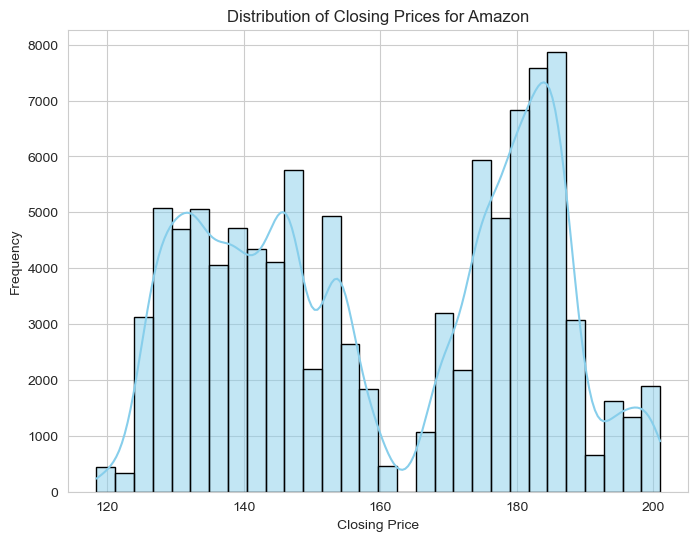

In [64]:
plt.figure(figsize=(8,6))
sns.histplot(df_new['close'],bins = 30,kde=True,color='skyblue',edgecolor='black')
plt.title('Distribution of Closing Prices for Amazon')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

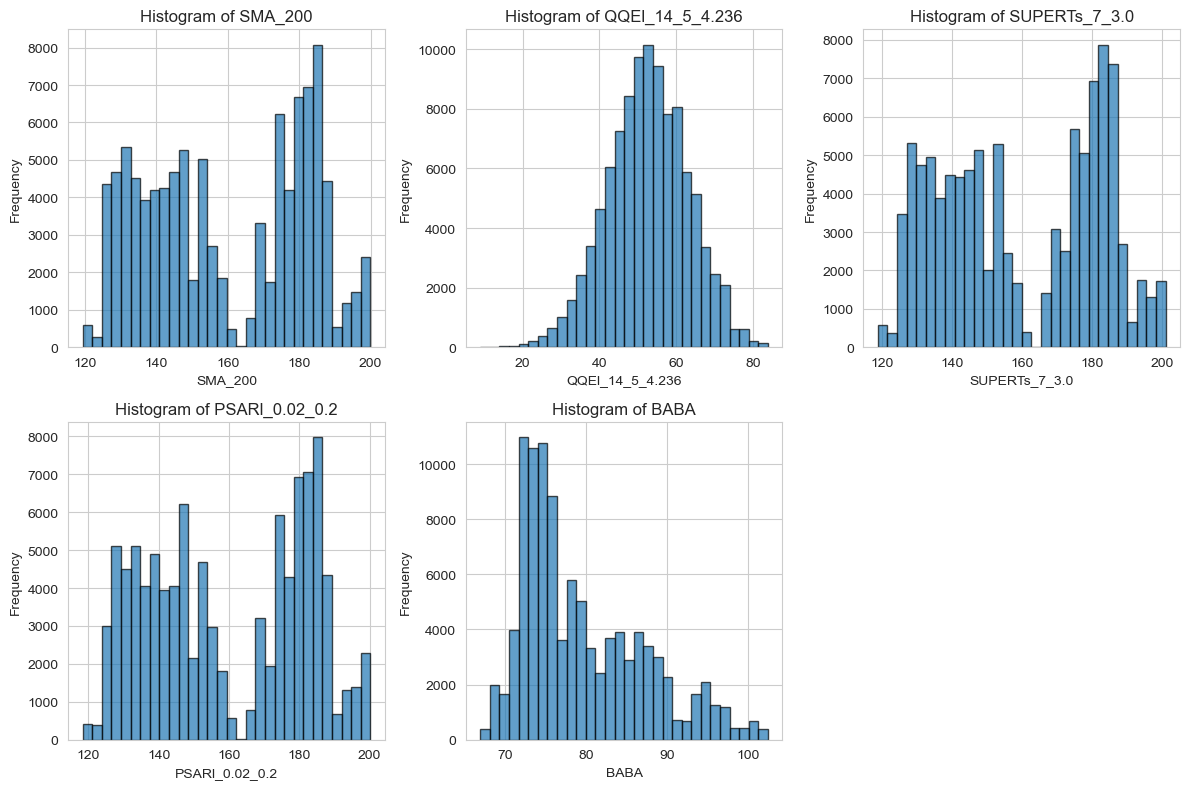

In [75]:
# Columns with nan values
columns_with_nan = ['SMA_200','QQEl_14_5_4.236', 'SUPERTs_7_3.0', 'PSARl_0.02_0.2','BABA']

# Plot histograms for each column
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_with_nan, 1):
    plt.subplot(2, 3, i)
    plt.hist(df_new[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

----------------------------------------

##### Imputation Strategy for QQE Column:

Since the QQE column follows a normal distribution, we will impute missing values using the mean value of the column.

##### KS Test for Distribution Validation:

For the other 4 columns, we will perform a Kolmogorov-Smirnov (KS) test to see if they follow the same distribution as the close value of Amazon.


In [76]:
from scipy.stats import ks_2samp
# Filling QQE
QQE_mean = df_new['QQEl_14_5_4.236'].mean()
df_new['QQEl_14_5_4.236'].fillna(QQE_mean,inplace=True)

# Performing the KS test on the other variables
columns_to_test = [ 'SMA_200', 'SUPERTs_7_3.0', 'PSARl_0.02_0.2', 'BABA']

for column in columns_to_test:
    target = df_new['close']
    test_col = column

    ks_statistic,p_value = ks_2samp(target,test_col)

    # Interpretation
    sig = 0.05
    if p_value < sig:
        print(f"The distributions are likely different (reject null hypothesis). KS statistic: {ks_statistic}, p-value: {p_value}")
    else:
        print(f"The distributions are likely similar (fail to reject null hypothesis). KS statistic: {ks_statistic}, p-value: {p_value}")


/var/folders/4r/7dgkc7nx5hs82x6_2yn0d3qc0000gn/T/ipykernel_49929/475144907.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['QQEl_14_5_4.236'].fillna(QQE_mean,inplace=True)


The distributions are likely different (reject null hypothesis). KS statistic: 1.0, p-value: 0.0
The distributions are likely different (reject null hypothesis). KS statistic: 1.0, p-value: 0.0
The distributions are likely different (reject null hypothesis). KS statistic: 1.0, p-value: 0.0
The distributions are likely different (reject null hypothesis). KS statistic: 1.0, p-value: 0.0


-------------------
##### It doesn't seem like they follow the same distribution so, for simplicity we can impute using the median for these columns.

In [77]:
# Calculate medians for each column in columns_to_test
median_vals = df_new[columns_to_test].median()

# Impute missing values using medians
df_new[columns_to_test] = df_new[columns_to_test].fillna(median_vals)

df_new.isna().sum().sum()

0

-----------------------------
##### No missing values remaining

---------------------
### Handling and detecting outliers

To handle any extreme points and outliers, we are choosing to go with a windsorized approach so as to not remove upper and lower values that can be important within the data. We will pull out those in the bottom and top 1%

In [79]:
import numpy as np
# Function to apply Windsorization
def windsorize(data, lower_percentile=1, upper_percentile=99):
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return np.clip(data, lower_bound, upper_bound)

# Apply Windsorization to all numeric columns
df_new = df_new.copy()
for col in df_new.select_dtypes(include=[np.number]).columns:
    df_new[col] = windsorize(df_new[col])

df_new.shape



(101977, 216)

In [86]:
df_new.head()

,close,high,low,trade_count,open,volume,vwap,SMA_10,SMA_2,SMA_5,...,Net_Income,Gross_Profit,Total_Debt,Operating_Cash_Flow,AAPL,MSFT,GOOGL,META,WMT,BABA
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-07-25 12:03:00+00:00,129.16,129.38,129.13,69.0,129.310,3608.0,129.282436,129.1145,129.325,129.246,...,3.042500e+10,9.380500e+10,3.259790e+11,8.494600e+10,193.65,346.340,122.77,294.750,160.020,98.280
2023-07-25 13:28:00+00:00,129.16,129.38,129.13,69.0,129.310,3608.0,129.282436,129.1145,129.325,129.246,...,3.042500e+10,9.380500e+10,3.259790e+11,8.494600e+10,193.38,346.340,122.77,294.750,160.020,98.280
2023-07-25 13:30:00+00:00,129.16,129.38,129.13,69.0,129.310,3608.0,129.282436,129.1145,129.325,129.246,...,3.042500e+10,9.380500e+10,3.259790e+11,8.494600e+10,193.38,346.340,122.77,294.750,160.020,98.280
2023-07-25 13:31:00+00:00,129.49,129.49,129.19,47.0,129.190,5545.0,129.277784,129.1145,129.325,129.246,...,3.042500e+10,9.380500e+10,3.259790e+11,8.494600e+10,193.14,346.760,122.77,296.065,160.515,98.030
2023-07-25 13:32:00+00:00,129.19,129.21,129.18,50.0,129.205,1599.0,129.200241,129.1145,129.340,129.246,...,3.042500e+10,9.380500e+10,3.259790e+11,8.494600e+10,193.10,345.865,122.77,296.500,160.290,98.215


----------------------------------
### Looking at how well each moving average handles noise.

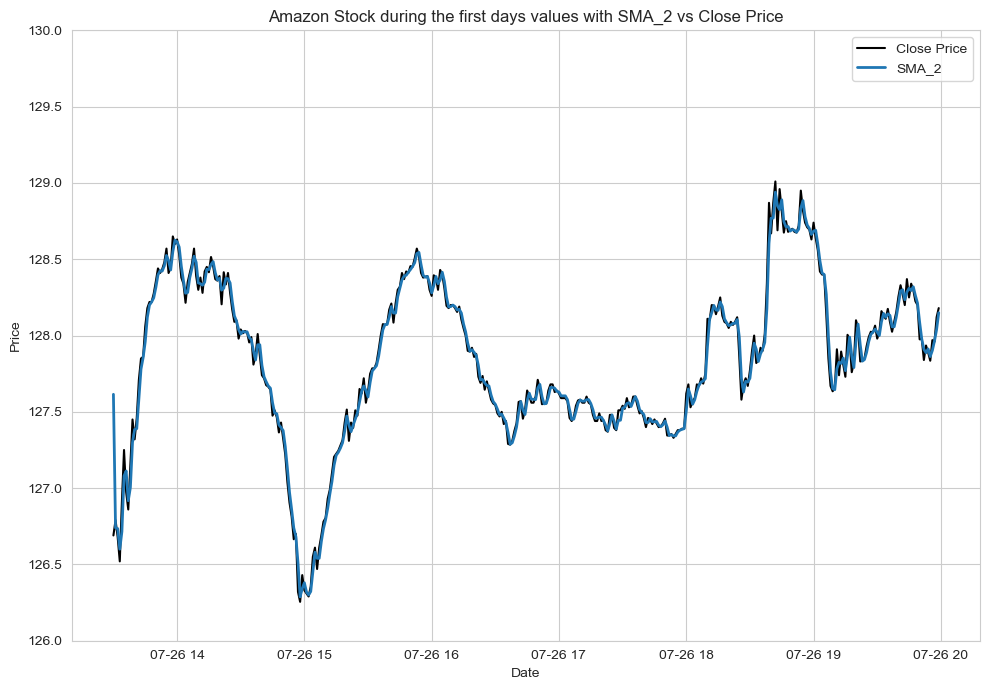

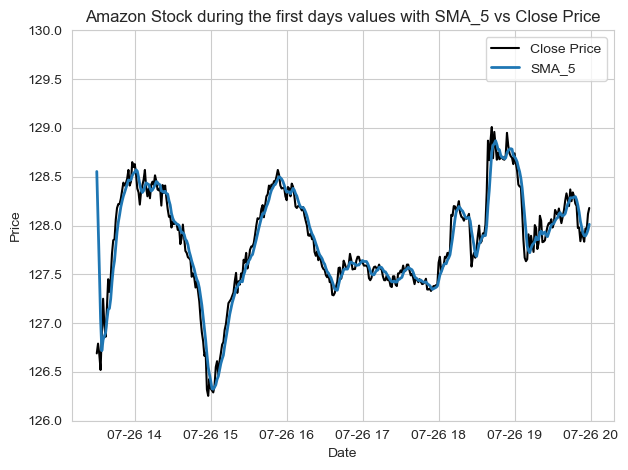

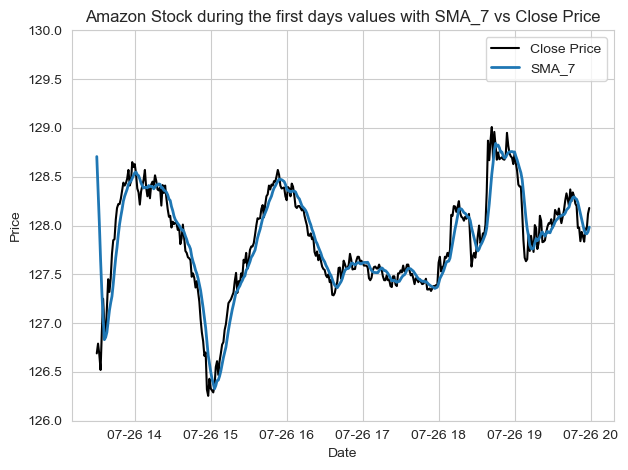

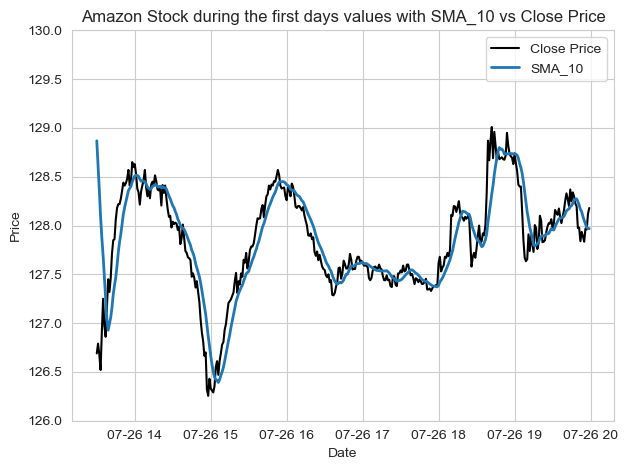

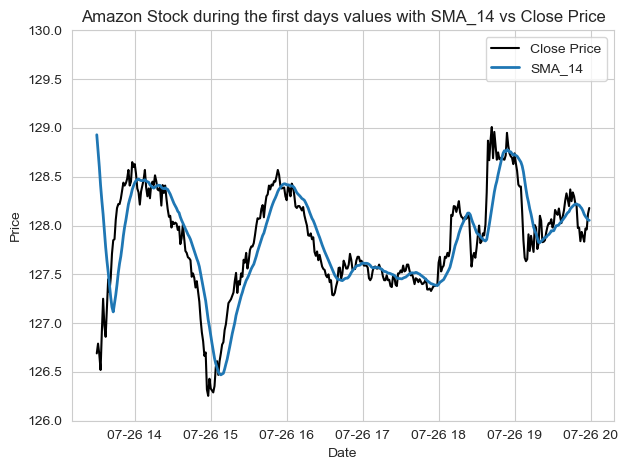

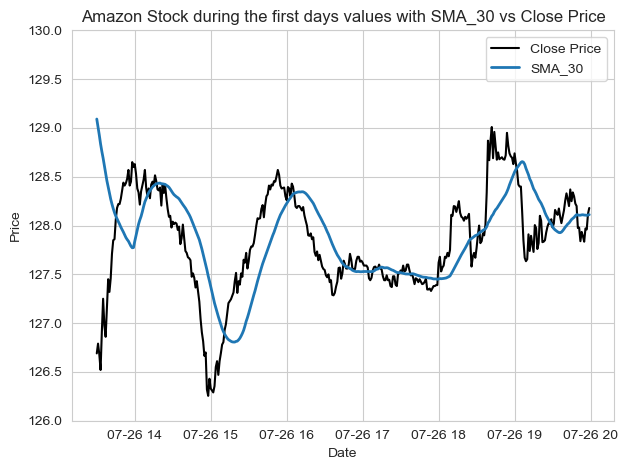

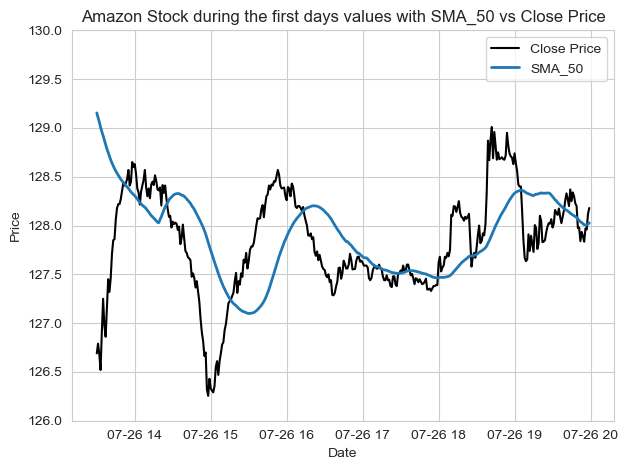

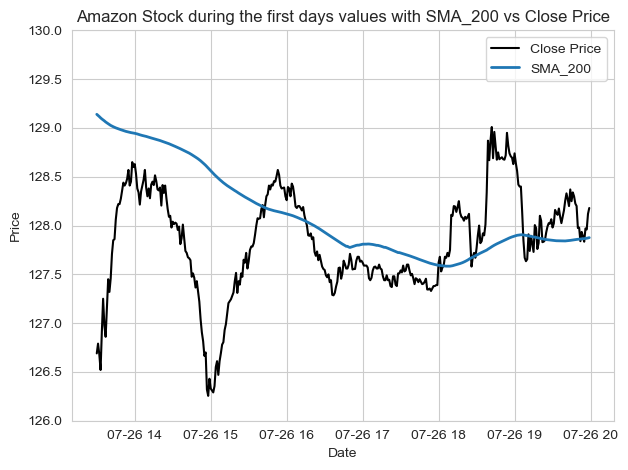

In [88]:
# Define the date range
start = '2023-07-26 13:30:00+00:00'
end = '2023-07-26 19:59:00+00:00'

subset_df = df_new[start:end]

# List of moving averages to plot
moving_averages = ['SMA_2', 'SMA_5', 'SMA_7', 'SMA_10', 'SMA_14', 'SMA_30', 'SMA_50', 'SMA_200']

# Set seaborn style
sns.set_style('whitegrid')

# Plotting each moving average against the close price
plt.figure(figsize=(10, 7))

for ma in moving_averages:
    plt.plot(subset_df.index, subset_df['close'], label='Close Price', color='black')
    plt.plot(subset_df.index, subset_df[ma], label=f'{ma}', linewidth=2)

    plt.title(f'Amazon Stock during the first days values with {ma} vs Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.ylim(126, 130)  # Set y-axis limits
    plt.legend()
    plt.tight_layout()
    plt.show()

The SMA-2 closely follows the closing price but may be overly sensitive to rapid changes and noise.

In contrast, the SMA-7 provides a smoother trend and could be used for plotting points and as a basis for peak and valley indicators.

Going forward, the SMA-7 line will be utilized to filter out noise across all data.

---

**Outlier Observations:**

Multiple applications of Windsorization were tested to retain the most variance of the closing price while filtering out extreme values by visualizing the plots above.

**Model Fine-Tuning Consideration:**

Fine-tuning the model may involve addressing outliers in feature columns based on their impact on the overall model.

**Approach:**

Windsorization seems effective for handling outliers, while the SMA is useful for managing noise.



-----------------------
### Duplicate values check and removal

In [89]:
# Check for duplicate rows
duplicate_rows = df_new[df_new.duplicated()]
print("Duplicate rows:\n", duplicate_rows)

# Optionally, drop duplicate rows
df_new = df_new.drop_duplicates()

Duplicate rows:
                              close      high      low  trade_count     open  \
timestamp                                                                     
2023-07-25 13:30:00+00:00  129.160  129.3800  129.130         69.0  129.310   
2023-07-25 20:00:00+00:00  129.140  129.2200  129.140        122.0  129.200   
2023-07-26 20:29:00+00:00  128.760  128.7600  128.760          2.0  128.760   
2023-07-26 20:35:00+00:00  128.760  128.7600  128.760          2.0  128.760   
2023-07-28 12:02:00+00:00  128.265  128.4000  128.235        137.0  128.290   
2023-07-28 12:03:00+00:00  128.265  128.4000  128.235        137.0  128.290   
2023-07-28 12:04:00+00:00  128.265  128.4000  128.235        137.0  128.290   
2023-07-28 12:06:00+00:00  128.265  128.4000  128.235        137.0  128.290   
2023-07-28 12:07:00+00:00  128.265  128.4000  128.235        137.0  128.290   
2023-07-28 12:08:00+00:00  128.265  128.4000  128.235        137.0  128.290   
2023-07-28 12:18:00+00:00  128.265 

In [90]:
htmldf(df_new.describe())

,close,high,low,trade_count,open,volume,vwap,SMA_10,SMA_2,SMA_5,SMA_7,SMA_14,SMA_30,SMA_50,SMA_200,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ABER_ZG_5_15_A_BBL_20_2.0,ACCBL_20,ACCBM_20,ACCBU_20,AD,ADOSC_3_10,ADX_14,DMP_14,DMN_14,ALMA_10_6.0_0.85,AMATe_LR_8_21_2,AMATe_SR_8_21_2,AO_5_34,OBV,OBV_min_2,OBV_max_2,OBVe_4,OBVe_12,AOBV_LR_2,AOBV_SR_2,APO_12_26,AROOND_14,AROONU_14,AROONOSC_14,ATRr_14,ABER_ZG_5_15_B_BBL_20_2.0,BIAS_SMA_26,BOP,AR_26,BR_26,CCI_14_0.015,CFO_9,CG_10,CMO_14,COPC_11_14_10,CTI_12,ER_10,BULLP_13,BEARP_13,FISHERT_9_1,FISHERTs_9_1,INERTIA_20_14,K_9_3,D_9_3,J_9_3,KST_10_15_20_30_10_10_10_15,KSTs_9,MOM_10,PGO_14,PPO_12_26_9,PPOh_12_26_9,PPOs_12_26_9,PSL_12,PVO_12_26_9,PVOh_12_26_9,PVOs_12_26_9,QQE_14_5_4.236,QQE_14_5_4.236_RSIMA,QQEl_14_5_4.236,QQEs_14_5_4.236,ROC_10,RSX_14,RVGI_14_4,RVGIs_14_4,SLOPE_1,SMI_5_20_5,SMIs_5_20_5,SMIo_5_20_5,SQZ_20_2.0_20_1.5,SQZ_ON,SQZ_OFF,SQZ_NO,SQZPRO_20_2.0_20_2_1.5_1,SQZPRO_ON_WIDE,SQZPRO_ON_NORMAL,SQZPRO_ON_NARROW,SQZPRO_OFF,SQZPRO_NO,STC_10_12_26_0.5,STCmacd_10_12_26_0.5,STCstoch_10_12_26_0.5,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,TRIX_30_9,TRIXs_30_9,TSI_13_25_13,TSIs_13_25_13,UO_7_14_28,WILLR_14,DEMA_10,EMA_10,FWMA_10,HILO_13_21,HILOl_13_21,HILOs_13_21,HL2,HLC3,HMA_10,HWMA_0.2_0.1_0.1,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,JMA_7_0,KAMA_10_2_30,LR_14,MIDPOINT_2,OHLC4,PWMA_10,SINWMA_14,SSF_10_2,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0,T3_10_0.7,TEMA_10,TRIMA_10,VIDYA_14,VWAP_D,VWMA_10,WCP,ZL_EMA_10,LOGRET_1,PCTRET_1,ENTP_10,KURT_30,MAD_30,MEDIAN_30,QTL_30_0.5,SKEW_30,STDEV_30,TOS_STDEVALL_LR,TOS_STDEVALL_L_1,TOS_STDEVALL_U_1,TOS_STDEVALL_L_2,TOS_STDEVALL_U_2,TOS_STDEVALL_L_3,TOS_STDEVALL_U_3,VAR_30,ZS_30,CHOP_14_1_100,CKSPl_10_3_20,CKSPs_10_3_20,LDECAY_5,DEC_1,DPO_20,INC_1,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2,QS_10,TTM_TRND_6,VHF_28,VTXP_14,VTXM_14,DCL_20_20,DCM_20_20,DCU_20_20,HWM,HWU,HWL,KCLe_20_2,KCBe_20_2,KCUe_20_2,MASSI_9_25,NATR_14,PDIST,RVI_14,THERMO_20_2_0.5,THERMOma_20_2_0.5,THERMOl_20_2_0.5,THERMOs_20_2_0.5,TRUERANGE_1,UI_14,Revenue,Net_Income,Gross_Profit,Total_Debt,Operating_Cash_Flow,AAPL,MSFT,GOOGL,META,WMT,BABA
count,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.0,101931.000000,101931.000000,101931.000000,1.019310e+05,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,1.019310e+05,1.019310e+05,1.019310e+05,1.019310e+05,1.019310e+05,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.0,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.0,101931.000000,101931.000000,101931.000000,101931.0,101931.00000,101931.0,101931.000000,101931.000000,101931.000000,1.019310e+05,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931.000000,101931

-------------------------
## Correlation Check

In [91]:
correlation_df = df_new.corr()
htmldf(correlation_df)

,close,high,low,trade_count,open,volume,vwap,SMA_10,SMA_2,SMA_5,SMA_7,SMA_14,SMA_30,SMA_50,SMA_200,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ABER_ZG_5_15_A_BBL_20_2.0,ACCBL_20,ACCBM_20,ACCBU_20,AD,ADOSC_3_10,ADX_14,DMP_14,DMN_14,ALMA_10_6.0_0.85,AMATe_LR_8_21_2,AMATe_SR_8_21_2,AO_5_34,OBV,OBV_min_2,OBV_max_2,OBVe_4,OBVe_12,AOBV_LR_2,AOBV_SR_2,APO_12_26,AROOND_14,AROONU_14,AROONOSC_14,ATRr_14,ABER_ZG_5_15_B_BBL_20_2.0,BIAS_SMA_26,BOP,AR_26,BR_26,CCI_14_0.015,CFO_9,CG_10,CMO_14,COPC_11_14_10,CTI_12,ER_10,BULLP_13,BEARP_13,FISHERT_9_1,FISHERTs_9_1,INERTIA_20_14,K_9_3,D_9_3,J_9_3,KST_10_15_20_30_10_10_10_15,KSTs_9,MOM_10,PGO_14,PPO_12_26_9,PPOh_12_26_9,PPOs_12_26_9,PSL_12,PVO_12_26_9,PVOh_12_26_9,PVOs_12_26_9,QQE_14_5_4.236,QQE_14_5_4.236_RSIMA,QQEl_14_5_4.236,QQEs_14_5_4.236,ROC_10,RSX_14,RVGI_14_4,RVGIs_14_4,SLOPE_1,SMI_5_20_5,SMIs_5_20_5,SMIo_5_20_5,SQZ_20_2.0_20_1.5,SQZ_ON,SQZ_OFF,SQZ_NO,SQZPRO_20_2.0_20_2_1.5_1,SQZPRO_ON_WIDE,SQZPRO_ON_NORMAL,SQZPRO_ON_NARROW,SQZPRO_OFF,SQZPRO_NO,STC_10_12_26_0.5,STCmacd_10_12_26_0.5,STCstoch_10_12_26_0.5,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,TRIX_30_9,TRIXs_30_9,TSI_13_25_13,TSIs_13_25_13,UO_7_14_28,WILLR_14,DEMA_10,EMA_10,FWMA_10,HILO_13_21,HILOl_13_21,HILOs_13_21,HL2,HLC3,HMA_10,HWMA_0.2_0.1_0.1,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,JMA_7_0,KAMA_10_2_30,LR_14,MIDPOINT_2,OHLC4,PWMA_10,SINWMA_14,SSF_10_2,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0,T3_10_0.7,TEMA_10,TRIMA_10,VIDYA_14,VWAP_D,VWMA_10,WCP,ZL_EMA_10,LOGRET_1,PCTRET_1,ENTP_10,KURT_30,MAD_30,MEDIAN_30,QTL_30_0.5,SKEW_30,STDEV_30,TOS_STDEVALL_LR,TOS_STDEVALL_L_1,TOS_STDEVALL_U_1,TOS_STDEVALL_L_2,TOS_STDEVALL_U_2,TOS_STDEVALL_L_3,TOS_STDEVALL_U_3,VAR_30,ZS_30,CHOP_14_1_100,CKSPl_10_3_20,CKSPs_10_3_20,LDECAY_5,DEC_1,DPO_20,INC_1,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2,QS_10,TTM_TRND_6,VHF_28,VTXP_14,VTXM_14,DCL_20_20,DCM_20_20,DCU_20_20,HWM,HWU,HWL,KCLe_20_2,KCBe_20_2,KCUe_20_2,MASSI_9_25,NATR_14,PDIST,RVI_14,THERMO_20_2_0.5,THERMOma_20_2_0.5,THERMOl_20_2_0.5,THERMOs_20_2_0.5,TRUERANGE_1,UI_14,Revenue,Net_Income,Gross_Profit,Total_Debt,Operating_Cash_Flow,AAPL,MSFT,GOOGL,META,WMT,BABA
close,1.000000,0.999995,0.999994,-0.130016,0.999989,-0.134593,0.999997,0.999934,0.999994,0.999970,0.999955,0.999909,0.999815,0.999694,0.997353,0.999706,0.999873,0.999769,-0.096070,-0.001425,0.005161,0.017376,0.000635,0.018339,0.999967,0.999963,0.999960,0.059394,NaN,0.999836,0.999873,0.999845,0.970692,0.011000,0.003212,0.131636,0.131161,0.999856,0.001490,-0.000842,0.014194,0.957421,0.957429,0.957415,0.957423,0.957425,-0.005533,0.005939,0.013651,-0.009936,-0.002412,0.004254,0.058581,NaN,0.009490,0.000308,0.013372,0.012474,-0.000902,-0.002303,0.004597,0.005161,0.010733,0.000462,0.022176,0.004547,0.010183,0.006177,0.006439,-0.012853,0.006596,0.008137,0.003341,0.014431,0.013921,0.005991,0.000641,0.012612,0.004170,0.012725,-0.004490,-0.015325,-0.005218,-0.015373,0.006014,0.006314,0.011905,-0.006340,0.004575,0.005285,-0.006025,-0.005810,-0.002509,0.005638,0.006293,-0.001664,0.011050,-0.035819,0.037156,NaN,0.011050,-0.066002,-0.035819,NaN,0.066712,NaN,-0.000880,0.017476,-0.000559,0.004392,0.004912,0.023854,0.023897,0.007856,0.008031,0.008075,0.004017,0.999980,0.999954,0.999985,0.999856,0.999720,0.999756,0.999997,0.999999,0.999978,0.999922,0.999455,0.999274,0.999952,0.999874,0.999506,0.999988,0.999931,0.999968,0.999994,0.999997,0.999913,0.999897,0.999943,0.999871,-0.000052,0.999601,0.999116,0.999904,0.999988,0.999923,0.999818,0.999200,0.999926,0.999999,0.999986,-0.002969,-0.003019,0.008598,-0.000182,0.071175,0.999776,0.999776,-0.015768,0.071894,0.948412,0.948412,0.948412,0.948412,0.948412,0.948412,0.948412,0.036433,-0.003955,-0.090728,0.999811,0.999768,0.999996,0.006107,0.015579,-0.004009,0.999716,0.999742,-0.009667,-0.003983,0.000364,0.004569,0.029437,-0.031142,-0.016108,0.999786,0.999903,0.999826,0.999922,0.999886,0.9998

**Correlation Analysis:**

Looking at the data above, it is evident that many variables are highly correlated with the column (close).

**Dimensionality Reduction:**

To reduce the dimensionality of the current variables and determine which of them contribute the most to the closing price, the variables with high correlations will be pulled out.

**Further Insight:**

Pulling out these variables and then running further analysis within these can help create new variables.

In [92]:
high_correlation_vars = correlation_df.index[abs(correlation_df['close']) >= 0.5]

# Create a DataFrame with only the filtered variables
filtered_df = df_new[high_correlation_vars]

htmldf(filtered_df.head())

,close,high,low,open,vwap,SMA_10,SMA_2,SMA_5,SMA_7,SMA_14,SMA_30,SMA_50,SMA_200,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ACCBL_20,ACCBM_20,ACCBU_20,AD,ALMA_10_6.0_0.85,OBV,OBV_min_2,OBV_max_2,OBVe_4,OBVe_12,DEMA_10,EMA_10,FWMA_10,HILO_13_21,HILOl_13_21,HILOs_13_21,HL2,HLC3,HMA_10,HWMA_0.2_0.1_0.1,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,JMA_7_0,KAMA_10_2_30,LR_14,MIDPOINT_2,OHLC4,PWMA_10,SINWMA_14,SSF_10_2,SUPERT_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0,T3_10_0.7,TEMA_10,TRIMA_10,VIDYA_14,VWAP_D,VWMA_10,WCP,ZL_EMA_10,MEDIAN_30,QTL_30_0.5,TOS_STDEVALL_LR,TOS_STDEVALL_L_1,TOS_STDEVALL_U_1,TOS_STDEVALL_L_2,TOS_STDEVALL_U_2,TOS_STDEVALL_L_3,TOS_STDEVALL_U_3,CKSPl_10_3_20,CKSPs_10_3_20,LDECAY_5,PSARl_0.02_0.2,PSARs_0.02_0.2,DCL_20_20,DCM_20_20,DCU_20_20,HWM,HWU,HWL,KCLe_20_2,KCBe_20_2,KCUe_20_2,MSFT,GOOGL,META,WMT,BABA
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-07-25 12:03:00+00:00,129.16,129.38,129.130,129.310,129.282436,129.1145,129.325,129.246,129.194286,129.081786,129.1305,129.1372,155.761,128.78817,129.15375,129.51933,129.232333,129.402667,128.952,128.715782,129.15375,129.549532,-2742.080000,124.500726,3608.0,3608.0,9153.0,7753.5,6835.5,129.324743,129.1145,128.95451,129.213077,129.213077,129.213077,129.2550,129.223333,128.86596,129.160000,129.14375,129.12,129.105,129.12,129.180,129.052317,124.490035,128.928813,129.325,129.24500,129.126982,129.056369,167.690279,124.530426,128.055,129.515895,129.181395,129.079025,129.1245,124.507695,129.223333,129.155334,129.20750,128.8865,129.105,129.105,123.599963,101.211556,145.98837,78.82315,168.376776,56.434743,190.765183,128.999396,129.329588,129.16,129.13,129.49,128.72,129.12,129.52,129.160000,129.160000,129.160000,128.750298,129.15375,129.560298,346.340,122.77,294.750,160.020,98.280
2023-07-25 13:28:00+00:00,129.16,129.38,129.130,129.310,129.282436,129.1145,129.325,129.246,129.194286,129.081786,129.1305,129.1372,155.761,128.78817,129.15375,129.51933,129.232333,129.402667,128.952,128.715782,129.15375,129.549532,-2742.080000,124.500726,3608.0,3608.0,9153.0,7753.5,6835.5,129.324743,129.1145,128.95451,129.213077,129.213077,129.213077,129.2550,129.223333,128.86596,129.160000,129.14375,129.12,129.105,129.12,129.180,129.052317,124.490035,128.928813,129.325,129.24500,129.126982,129.056369,167.690279,124.530426,128.055,129.515895,129.181395,129.079025,129.1245,124.507695,129.223333,129.155334,129.20750,128.8865,129.105,129.105,123.599963,101.211556,145.98837,78.82315,168.376776,56.434743,190.765183,128.999396,129.329588,129.16,129.13,129.49,128.72,129.12,129.52,129.160000,129.160000,129.160000,128.750298,129.15375,129.560298,346.340,122.77,294.750,160.020,98.280
2023-07-25 13:31:00+00:00,129.49,129.49,129.190,129.190,129.277784,129.1145,129.325,129.246,129.194286,129.081786,129.1305,129.1372,155.761,128.78817,129.15375,129.51933,129.232333,129.402667,128.952,128.715782,129.15375,129.549532,2802.920000,124.500726,9153.0,3608.0,9153.0,7753.5,6835.5,129.324743,129.1145,128.95451,129.213077,129.213077,129.213077,129.3400,129.390000,128.86596,129.232930,129.14375,129.12,129.105,129.12,129.025,129.052317,124.490035,128.928813,129.325,129.34000,129.126982,129.056369,152.639253,128.055000,128.055,129.515895,129.181395,129.079025,129.1245,124.507695,129.324302,129.155334,129.41500,128.8865,129.105,129.105,123.599963,101.211556,145.98837,78.82315,168.376776,56.434743,190.765183,128.999396,129.329588,129.49,129.13,129.49,128.72,129.12,129.52,129.232930,129.232930,129.232930,128.750298,129.15375,129.560298,346.760,122.77,296.065,160.515,98.030
2023-07-25 13:32:00+00:00,129.19,129.21,129.180,129.205,129.200241,129.1145,129.340,129.246,129.194286,129.081786,129.1305,129.1372,155.761,128.78817,129.15375,129.51933,129.232333,129.402667,128.952,128.715782,129.15375,129.549532,2269.920000,124.500726,7554.0,7554.0,9153.0,7753.5,6835.5,129.324743,129.1145,128.95451,129.213077,129.213077,129.213077,129.1950,129.193333,128.86596,129.230998,

In [93]:
# Feature count before removal
initial_feature_count = len(df_new.columns)

# Feature count after removal
filtered_feature_count = len(filtered_df.columns)

initial_feature_count, filtered_feature_count

(216, 91)

In [94]:
htmldf(filtered_df.corr())

,close,high,low,open,vwap,SMA_10,SMA_2,SMA_5,SMA_7,SMA_14,SMA_30,SMA_50,SMA_200,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ACCBL_20,ACCBM_20,ACCBU_20,AD,ALMA_10_6.0_0.85,OBV,OBV_min_2,OBV_max_2,OBVe_4,OBVe_12,DEMA_10,EMA_10,FWMA_10,HILO_13_21,HILOl_13_21,HILOs_13_21,HL2,HLC3,HMA_10,HWMA_0.2_0.1_0.1,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,JMA_7_0,KAMA_10_2_30,LR_14,MIDPOINT_2,OHLC4,PWMA_10,SINWMA_14,SSF_10_2,SUPERT_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0,T3_10_0.7,TEMA_10,TRIMA_10,VIDYA_14,VWAP_D,VWMA_10,WCP,ZL_EMA_10,MEDIAN_30,QTL_30_0.5,TOS_STDEVALL_LR,TOS_STDEVALL_L_1,TOS_STDEVALL_U_1,TOS_STDEVALL_L_2,TOS_STDEVALL_U_2,TOS_STDEVALL_L_3,TOS_STDEVALL_U_3,CKSPl_10_3_20,CKSPs_10_3_20,LDECAY_5,PSARl_0.02_0.2,PSARs_0.02_0.2,DCL_20_20,DCM_20_20,DCU_20_20,HWM,HWU,HWL,KCLe_20_2,KCBe_20_2,KCUe_20_2,MSFT,GOOGL,META,WMT,BABA
close,1.000000,0.999995,0.999994,0.999989,0.999997,0.999934,0.999994,0.999970,0.999955,0.999909,0.999815,0.999694,0.997353,0.999706,0.999873,0.999769,0.999967,0.999963,0.999960,0.999836,0.999873,0.999845,0.970692,0.999856,0.957421,0.957429,0.957415,0.957423,0.957425,0.999980,0.999954,0.999985,0.999856,0.999720,0.999756,0.999997,0.999999,0.999978,0.999922,0.999455,0.999274,0.999952,0.999874,0.999506,0.999988,0.999931,0.999968,0.999994,0.999997,0.999913,0.999897,0.999943,0.999871,0.999601,0.999116,0.999904,0.999988,0.999923,0.999818,0.999200,0.999926,0.999999,0.999986,0.999776,0.999776,0.948412,0.948412,0.948412,0.948412,0.948412,0.948412,0.948412,0.999811,0.999768,0.999996,0.999716,0.999742,0.999786,0.999903,0.999826,0.999922,0.999886,0.999895,0.999870,0.999905,0.999893,0.956845,0.848373,0.960083,-0.849270,-0.583469
high,0.999995,1.000000,0.999990,0.999994,0.999997,0.999937,0.999994,0.999972,0.999958,0.999912,0.999817,0.999697,0.997351,0.999691,0.999876,0.999791,0.999970,0.999972,0.999958,0.999829,0.999876,0.999859,0.970700,0.999859,0.957411,0.957419,0.957406,0.957414,0.957417,0.999981,0.999956,0.999986,0.999858,0.999725,0.999757,0.999997,0.999997,0.999980,0.999925,0.999457,0.999274,0.999955,0.999877,0.999502,0.999990,0.999933,0.999970,0.999994,0.999997,0.999917,0.999901,0.999946,0.999877,0.999609,0.999115,0.999908,0.999989,0.999927,0.999820,0.999203,0.999928,0.999997,0.999987,0.999779,0.999779,0.948441,0.948441,0.948441,0.948441,0.948441,0.948441,0.948441,0.999821,0.999762,0.999994,0.999718,0.999748,0.999771,0.999905,0.999846,0.999925,0.999896,0.999890,0.999862,0.999908,0.999906,0.956818,0.848412,0.960065,-0.849268,-0.583478
low,0.999994,0.999990,1.000000,0.999994,0.999997,0.999937,0.999993,0.999972,0.999957,0.999912,0.999818,0.999698,0.997362,0.999728,0.999877,0.999754,0.999970,0.999962,0.999967,0.999850,0.999877,0.999838,0.970683,0.999860,0.957429,0.957439,0.957423,0.957433,0.957435,0.999981,0.999956,0.999986,0.999861,0.999722,0.999765,0.999997,0.999997,0.999980,0.999924,0.999460,0.999280,0.999955,0.999877,0.999499,0.999989,0.999934,0.999970,0.999993,0.999997,0.999916,0.999900,0.999945,0.999877,0.999602,0.999126,0.999908,0.999988,0.999927,0.999822,0.999204,0.999930,0.999997,0.999987,0.999780,0.999780,0.948387,0.948387,0.948387,0.948387,0.948387,0.948387,0.948387,0.999807,0.999779,0.999990,0.999723,0.999745,0.999806,0.999906,0.999811,0.999924,0.999880,0.999904,0.999883,0.999908,0.999886,0.956861,0.848327,0.960099,-0.849292,-0.583458
open,0.999989,0.999994,0.999994,1.000000,0.999996,0.999941,0.999994,0.999976,0.999962,0.999916,0.999822,0.999702,0.997360,0.999714,0.999881,0.999777,0.999974,0.999971,0.999967,0.999844,0.999881,0.999853,0.970687,0.999865,0.957415,0.957425,0.957411,0.957420,0.957423,0.999983,0.999959,0.999987,0.999865,0.999729,0.999767,0.999997,0.999995,0.999983,0.999928,0.999463,0.999282,0.999958,0.999880,0.999497,0.999992,0.999937,0.999973,0.999994,0.999997,0.999922,0.999905,0.999949,0.999883,0.999611,0.999126,0.999913,0.999989,0.999932,0.999826,0.999207,0.999933,0.999994,0.999989,0.999784,0.999784,0.948410,0.948410,0.948410,0.948410,0.948410,0.948410,0.948410,0.999818,0.999775,0.999989,

### Creating New Features before further reduction

---------------
#### Peak indicator shows whether the value peaks at all at that point
This is done by taking the previous value and seeing if its lower, and the value after and seeing if its below as well. This would show that the current value is a peak.
#### Valley Indicator shows whether the value is in a valley
This one is done in an opposite fashion of the peak by seeing if the values before and after are higher.

In [95]:
# Peak indicator to see if a value is a peak of the closing price

filtered_df = filtered_df.copy()

filtered_df.loc[:, 'peak'] = ((filtered_df['close'].shift(1) < filtered_df['close']) & (filtered_df['close'].shift(-1) < filtered_df['close'])).astype(int)


filtered_df[['close', 'peak']].head(20)


,close,peak
timestamp,,
2023-07-25 12:03:00+00:00,129.160,0
2023-07-25 13:28:00+00:00,129.160,0
2023-07-25 13:31:00+00:00,129.490,1
2023-07-25 13:32:00+00:00,129.190,0
2023-07-25 13:33:00+00:00,129.300,1
2023-07-25 13:34:00+00:00,129.090,0
2023-07-25 13:35:00+00:00,129.165,1
2023-07-25 13:36:00+00:00,128.965,0
2023-07-25 13:37:00+00:00,129.010,0


Above we can see five accurately defined peaks, now we can plot them to double check.

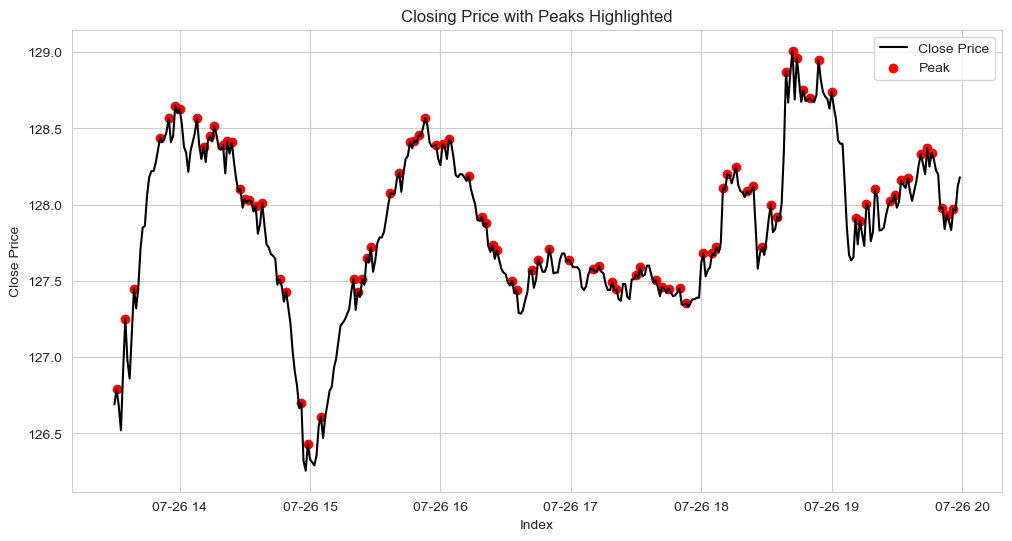

In [96]:
#Snippet of data for visualization
snippet_df = filtered_df[start:end] 

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(snippet_df.index, snippet_df['close'], label='Close Price', color='black')

# Highlight the peaks with red circles
peaks = snippet_df[snippet_df['peak'] == 1]
plt.scatter(peaks.index, peaks['close'], color='red', marker='o', label='Peak')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Closing Price with Peaks Highlighted')
plt.legend()

# Show the plot
plt.show()

We can see from the plot that the peaks are fairly accurately defined so we can assume they are for the rest of the data as well.
A new set of peaks can also be defined indicating extreme peaks.


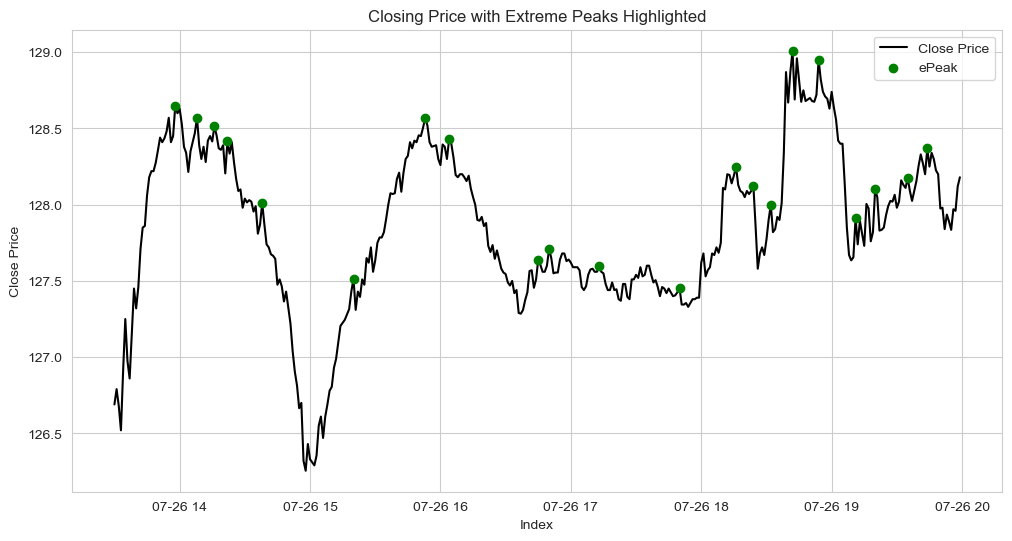

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Ensure that there are no NaN values
filtered_df = filtered_df.ffill().bfill()

# Detect peaks in the 'close' column
peaks, _ = find_peaks(filtered_df['close'])
peak_indices = filtered_df.index[peaks]  # Map peak indices to DataFrame index
filtered_df['peak'] = 0
filtered_df.loc[peak_indices, 'peak'] = 1

# Ensure that the index is in Datetime format and timezone-aware
if not isinstance(filtered_df.index, pd.DatetimeIndex):
    filtered_df.index = pd.to_datetime(filtered_df.index)
if filtered_df.index.tzinfo is None:
    filtered_df.index = filtered_df.index.tz_localize('UTC')  

# Convert DatetimeIndex to RangeIndex for position handling
filtered_df = filtered_df.reset_index()
filtered_df.set_index('timestamp', inplace=True)

# Define function to determine if a peak is an extreme peak
def is_extreme_peak(index):
    if index not in filtered_df.index:
        return 0

    # Convert index to position
    peak_loc = filtered_df.index.get_loc(index)
    
    # Ensure peak_loc is an integer
    if isinstance(peak_loc, slice):
        return 0  
    
    # Define the range for previous and next peaks
    before_range = range(max(peak_loc - 4, 0), peak_loc)
    after_range = range(peak_loc + 1, min(peak_loc + 5, len(filtered_df)))
    
    # Get the values of the peaks before and after
    before_peaks = filtered_df.iloc[list(before_range)]['close']
    after_peaks = filtered_df.iloc[list(after_range)]['close']
    
    # Check if the current peak is higher than the 4 previous and 4 next peaks
    if len(before_peaks) < 4 or len(after_peaks) < 4:
        return 0
    
    current_value = filtered_df.loc[index, 'close']
    if (current_value > before_peaks.max()) and (current_value > after_peaks.max()):
        return 1
    else:
        return 0

# Apply the function to determine if each peak is an extreme peak
filtered_df['epeak'] = filtered_df.index.map(is_extreme_peak)

# Ensure timezone-aware timestamps for slicing
start = pd.Timestamp('2023-07-26 13:30:00', tz='UTC')
end = pd.Timestamp('2023-07-26 19:59:00', tz='UTC')


snippet_2_df = filtered_df.loc[start:end]


plt.figure(figsize=(12, 6))
plt.plot(snippet_2_df.index, snippet_2_df['close'], label='Close Price', color='black')

# Highlight the extreme peaks with green circles
epeaks = snippet_2_df[snippet_2_df['epeak'] == 1]
plt.scatter(epeaks.index, epeaks['close'], color='green', marker='o', label='ePeak', zorder=5)  # zorder to bring markers to the front

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Closing Price with Extreme Peaks Highlighted')
plt.legend()

# Show the plot
plt.show()


### Extreme Peaks (ePeak) Indicator

In this analysis, the **ePeak** indicator identifies peaks that are higher than the previous four peaks and the next four peaks. This approach ensures that only the most significant peaks are considered, leading to a more accurate indication of true peaks in the dataset.

**Importance of the ePeak Indicator:**

- **Predictive Value:** By using future models to predict these significant peaks, investors can be prompted to take action, such as selling their stake, at optimal times.
- **Strategic Decision-Making:** This indicator helps in making informed investment decisions by pinpointing critical moments when stock values reach their highest points.

This refined approach enhances the reliability of peak detection and provides actionable insights for investment strategies.


------------------
## Valley Indicator Creation

In [99]:
# Peak indicator to see if a value is a peak of the closing price

filtered_df.loc[:, 'valley'] = ((filtered_df['close'].shift(1) > filtered_df['close']) & (filtered_df['close'].shift(-1) > filtered_df['close'])).astype(int)


filtered_df[['close', 'valley']].head(20)

,close,valley
timestamp,,
2023-07-25 12:03:00+00:00,129.160,0
2023-07-25 13:28:00+00:00,129.160,0
2023-07-25 13:31:00+00:00,129.490,0
2023-07-25 13:32:00+00:00,129.190,1
2023-07-25 13:33:00+00:00,129.300,0
2023-07-25 13:34:00+00:00,129.090,1
2023-07-25 13:35:00+00:00,129.165,0
2023-07-25 13:36:00+00:00,128.965,1
2023-07-25 13:37:00+00:00,129.010,0


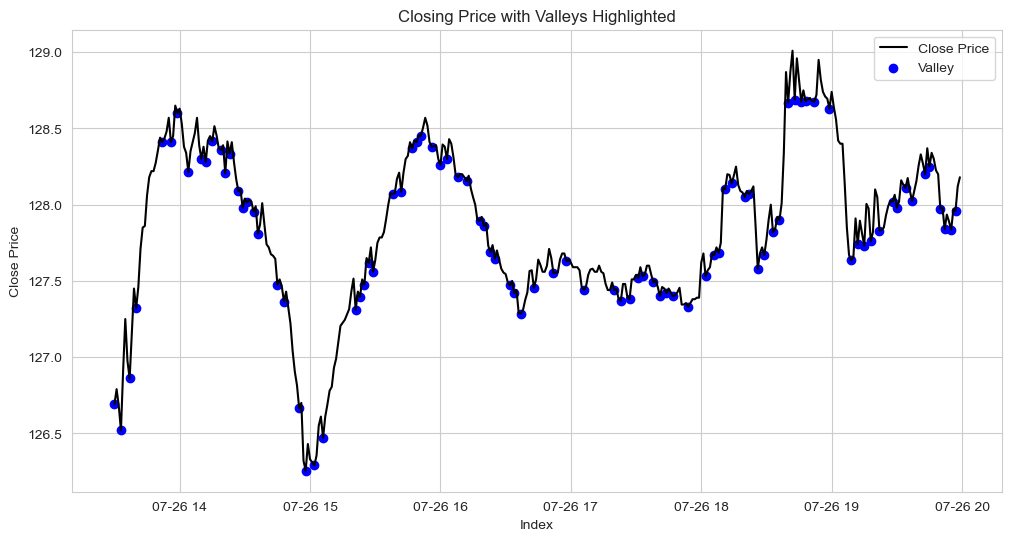

In [100]:
#Snippet of data for visualization
snippet_df = filtered_df[start:end] 

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(snippet_df.index, snippet_df['close'], label='Close Price', color='black')

# Highlight the peaks with red circles
peaks = snippet_df[snippet_df['valley'] == 1]
plt.scatter(peaks.index, peaks['close'], color='blue', marker='o', label='Valley')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Closing Price with Valleys Highlighted')
plt.legend()

# Show the plot
plt.show()

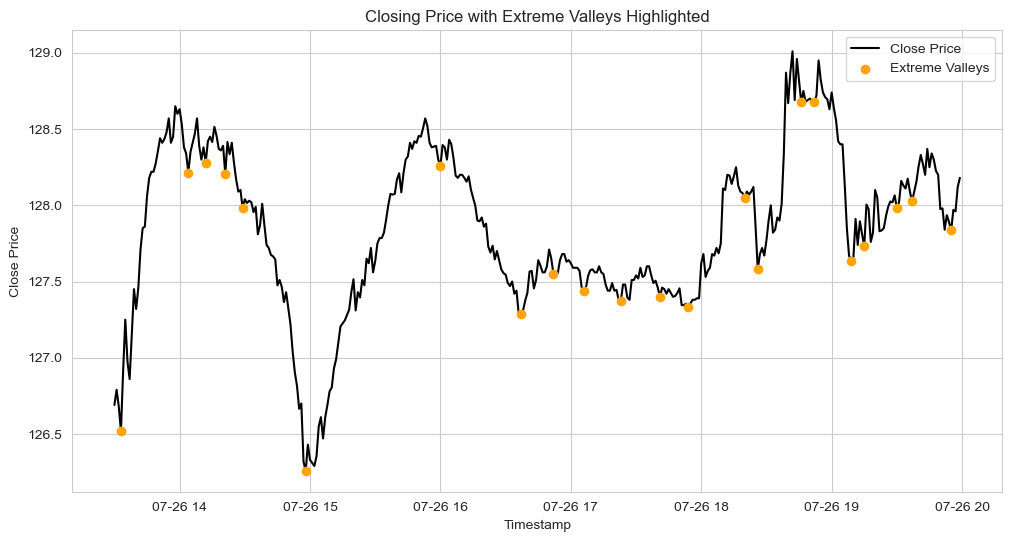

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Ensure that there are no NaN values
filtered_df = filtered_df.ffill().bfill()

# Detect valleys in the 'close' column by using the negative values
valleys, _ = find_peaks(-filtered_df['close'])
valley_indices = filtered_df.index[valleys]  # Map valley indices to DataFrame index
filtered_df['valley'] = 0
filtered_df.loc[valley_indices, 'valley'] = 1


if not isinstance(filtered_df.index, pd.DatetimeIndex):
    filtered_df.index = pd.to_datetime(filtered_df.index)
if filtered_df.index.tzinfo is None:
    filtered_df.index = filtered_df.index.tz_localize('UTC')  

# Define function to determine if a valley is an extreme valley
def is_extreme_valley(index):
    if index not in filtered_df.index:
        return 0

    # Convert index to position
    valley_loc = filtered_df.index.get_loc(index)
    
    # Ensure valley_loc is an integer
    if isinstance(valley_loc, slice):
        return 0  
    
    # Define the range for previous and next valleys
    before_range = range(max(valley_loc - 4, 0), valley_loc)
    after_range = range(valley_loc + 1, min(valley_loc + 5, len(filtered_df)))
    
    # Get the values of the valleys before and after
    before_valleys = filtered_df.iloc[list(before_range)]['close']
    after_valleys = filtered_df.iloc[list(after_range)]['close']
    
    # Check if the current valley is lower than the 4 previous and 4 next valleys
    if len(before_valleys) < 4 or len(after_valleys) < 4:
        return 0
    
    current_value = filtered_df.loc[index, 'close']
    if (current_value < before_valleys.min()) and (current_value < after_valleys.min()):
        return 1
    else:
        return 0

# Apply the function to determine if each valley is an extreme valley
filtered_df['evalley'] = filtered_df.index.map(is_extreme_valley)


start = pd.Timestamp('2023-07-26 13:30:00', tz='UTC')
end = pd.Timestamp('2023-07-26 19:59:00', tz='UTC')


snippet_2_df = filtered_df.loc[start:end]

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(snippet_2_df.index, snippet_2_df['close'], label='Close Price', color='black')

# Highlight the extreme valleys with orange circles
evalleys = snippet_2_df[snippet_2_df['evalley'] == 1]
plt.scatter(evalleys.index, evalleys['close'], color='orange', marker='o', label='Extreme Valleys', zorder=5)  

# Adding labels and title
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.title('Closing Price with Extreme Valleys Highlighted')
plt.legend()

# Show the plot
plt.show()


### Extreme Valleys (eValley) Indicator

In this analysis, the **eValley** indicator identifies valleys that are lower than the previous four valleys and the next four valleys. This method ensures that only the most significant valleys are considered, leading to a more accurate indication of true valleys in the dataset.

**Importance of the eValley Indicator:**

- **Predictive Value:** By using future models to predict these significant valleys, investors can be prompted to buy more of the stock at optimal times.
- **Strategic Decision-Making:** This indicator aids in making informed investment decisions by identifying critical moments when stock values reach their lowest points.

This refined approach enhances the reliability of valley detection and provides actionable insights for investment strategies.


--------------------------------------
## Other Stocks Peak and Valley Indicator Creation

In [102]:
# Peaks
filtered_df.loc[:, 'g_peak'] = ((filtered_df['GOOGL'].shift(1) < filtered_df['GOOGL']) & (filtered_df['GOOGL'].shift(-1) < filtered_df['GOOGL'])).astype(int)
filtered_df.loc[:, 'm_peak'] = ((filtered_df['META'].shift(1) < filtered_df['META']) & (filtered_df['META'].shift(-1) < filtered_df['META'])).astype(int)
filtered_df.loc[:, 'w_peak'] = ((filtered_df['WMT'].shift(1) < filtered_df['WMT']) & (filtered_df['WMT'].shift(-1) < filtered_df['WMT'])).astype(int)
filtered_df.loc[:, 'b_peak'] = ((filtered_df['BABA'].shift(1) < filtered_df['BABA']) & (filtered_df['BABA'].shift(-1) < filtered_df['BABA'])).astype(int)
filtered_df.loc[:, 'ms_peak'] = ((filtered_df['MSFT'].shift(1) < filtered_df['MSFT']) & (filtered_df['MSFT'].shift(-1) < filtered_df['MSFT'])).astype(int)

# Valleys
filtered_df.loc[:, 'g_valley'] = ((filtered_df['GOOGL'].shift(1) > filtered_df['GOOGL']) & (filtered_df['GOOGL'].shift(-1) > filtered_df['GOOGL'])).astype(int)
filtered_df.loc[:, 'm_valley'] = ((filtered_df['META'].shift(1) > filtered_df['META']) & (filtered_df['META'].shift(-1) > filtered_df['META'])).astype(int)
filtered_df.loc[:, 'w_valley'] = ((filtered_df['WMT'].shift(1) > filtered_df['WMT']) & (filtered_df['WMT'].shift(-1) > filtered_df['WMT'])).astype(int)
filtered_df.loc[:, 'b_valley'] = ((filtered_df['BABA'].shift(1) > filtered_df['BABA']) & (filtered_df['BABA'].shift(-1) > filtered_df['BABA'])).astype(int)
filtered_df.loc[:, 'ms_valley'] = ((filtered_df['MSFT'].shift(1) > filtered_df['MSFT']) & (filtered_df['MSFT'].shift(-1) > filtered_df['MSFT'])).astype(int)


Having other peaks and velleys of stocks could add information to predict amazon stock price behaviors.

In [103]:
print('Number of Features Before: 91')
new_column_c = len(filtered_df.columns)
print(f'Number of Features After : {new_column_c}')

Number of Features Before: 91
Number of Features After : 105


---------------
## Creation of New Feature Ratios

-----------
### Close to Open Ratio

In [104]:
filtered_df['c_o_ratio'] = filtered_df['close']/filtered_df['open']

filtered_df[['c_o_ratio','close','open']].head(10)

,c_o_ratio,close,open
timestamp,,,
2023-07-25 12:03:00+00:00,0.998840,129.160,129.310
2023-07-25 13:28:00+00:00,0.998840,129.160,129.310
2023-07-25 13:31:00+00:00,1.002322,129.490,129.190
2023-07-25 13:32:00+00:00,0.999884,129.190,129.205
2023-07-25 13:33:00+00:00,1.000619,129.300,129.220
2023-07-25 13:34:00+00:00,0.998801,129.090,129.245
2023-07-25 13:35:00+00:00,1.001279,129.165,129.000
2023-07-25 13:36:00+00:00,1.000621,128.965,128.885
2023-07-25 13:37:00+00:00,1.002253,129.010,128.720


-------------
### 'Close' rolling interval ratios

In [105]:
filtered_df['1_ratio'] =filtered_df['close']/filtered_df['close'].shift(1) # CP/CP 1 min ago
filtered_df['5_ratio'] = filtered_df['close']/filtered_df['close'].shift(5) # CP/CP 5 mins ago
filtered_df['10_ratio'] = filtered_df['close']/filtered_df['close'].shift(10) # CP/CP 10 mins ago
filtered_df['20_ratio'] = filtered_df['close']/filtered_df['close'].shift(20) # CP/CP 20 mins ago
filtered_df['30_ratio'] = filtered_df['close']/filtered_df['close'].shift(30) # CP/CP 30 mins ago
filtered_df['60_ratio'] = filtered_df['close']/filtered_df['close'].shift(60) # CP/CP 60 mins ago
filtered_df['120_ratio'] = filtered_df['close']/filtered_df['close'].shift(120) # CP/CP 2 hours ago
filtered_df['720_ratio'] = filtered_df['close']/filtered_df['close'].shift(720) # CP/CP 6 hours ago
filtered_df[['1_ratio','5_ratio','10_ratio','20_ratio','30_ratio','60_ratio','120_ratio','close']].head(121)

,1_ratio,5_ratio,10_ratio,20_ratio,30_ratio,60_ratio,120_ratio,close
timestamp,,,,,,,,
2023-07-25 12:03:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.160
2023-07-25 13:28:00+00:00,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,129.160
2023-07-25 13:31:00+00:00,1.002555,NaN,NaN,NaN,NaN,NaN,NaN,129.490
2023-07-25 13:32:00+00:00,0.997683,NaN,NaN,NaN,NaN,NaN,NaN,129.190
2023-07-25 13:33:00+00:00,1.000851,NaN,NaN,NaN,NaN,NaN,NaN,129.300
...,...,...,...,...,...,...,...,...
2023-07-25 15:25:00+00:00,0.999147,0.999224,0.998759,1.000777,1.001594,0.996441,NaN,128.780
2023-07-25 15:26:00+00:00,1.000815,1.000272,0.999573,1.001632,1.002450,0.997099,NaN,128.885
2023-07-25 15:27:00+00:00,0.999418,0.999690,0.999031,1.000932,1.001088,0.997290,NaN,128.810


#### For other stocks

In [109]:
# META 
filtered_df['1m_ratio'] =filtered_df['META']/filtered_df['META'].shift(1) # CP/CP 1 min ago
filtered_df['5m_ratio'] = filtered_df['META']/filtered_df['META'].shift(5) # CP/CP 5 mins ago
filtered_df['10m_ratio'] = filtered_df['META']/filtered_df['META'].shift(10) # CP/CP 10 mins ago
filtered_df['20m_ratio'] = filtered_df['META']/filtered_df['META'].shift(20) # CP/CP 20 mins ago
filtered_df['30m_ratio'] = filtered_df['META']/filtered_df['META'].shift(30) # CP/CP 30 mins ago
filtered_df['60m_ratio'] = filtered_df['META']/filtered_df['META'].shift(60) # CP/CP 60 mins ago
filtered_df['120m_ratio'] = filtered_df['META']/filtered_df['META'].shift(120) # CP/CP 2 hours ago
filtered_df['720m_ratio'] = filtered_df['META']/filtered_df['META'].shift(720) # CP/CP 6 hours ago
# Google
filtered_df['1g_ratio'] =filtered_df['GOOGL']/filtered_df['GOOGL'].shift(1) # CP/CP 1 min ago
filtered_df['5g_ratio'] = filtered_df['GOOGL']/filtered_df['GOOGL'].shift(5) # CP/CP 5 mins ago
filtered_df['10g_ratio'] = filtered_df['GOOGL']/filtered_df['GOOGL'].shift(10) # CP/CP 10 mins ago
filtered_df['20g_ratio'] = filtered_df['GOOGL']/filtered_df['GOOGL'].shift(20) # CP/CP 20 mins ago
filtered_df['30g_ratio'] = filtered_df['GOOGL']/filtered_df['GOOGL'].shift(30) # CP/CP 30 mins ago
filtered_df['60g_ratio'] = filtered_df['GOOGL']/filtered_df['GOOGL'].shift(60) # CP/CP 60 mins ago
filtered_df['120g_ratio'] = filtered_df['GOOGL']/filtered_df['GOOGL'].shift(120) # CP/CP 2 hours ago
filtered_df['720g_ratio'] = filtered_df['GOOGL']/filtered_df['GOOGL'].shift(720) # CP/CP 6 hours ago
# BABA
filtered_df['1b_ratio'] =filtered_df['BABA']/filtered_df['BABA'].shift(1) # CP/CP 1 min ago
filtered_df['5b_ratio'] = filtered_df['BABA']/filtered_df['BABA'].shift(5) # CP/CP 5 mins ago
filtered_df['10b_ratio'] = filtered_df['BABA']/filtered_df['BABA'].shift(10) # CP/CP 10 mins ago
filtered_df['20b_ratio'] = filtered_df['BABA']/filtered_df['BABA'].shift(20) # CP/CP 20 mins ago
filtered_df['30b_ratio'] = filtered_df['BABA']/filtered_df['BABA'].shift(30) # CP/CP 30 mins ago
filtered_df['60b_ratio'] = filtered_df['BABA']/filtered_df['BABA'].shift(60) # CP/CP 60 mins ago
filtered_df['120b_ratio'] = filtered_df['BABA']/filtered_df['BABA'].shift(120) # CP/CP 2 hours ago
filtered_df['720b_ratio'] = filtered_df['BABA']/filtered_df['BABA'].shift(720) # CP/CP 6 hours ago
# Microsoft
filtered_df['1ms_ratio'] =filtered_df['MSFT']/filtered_df['MSFT'].shift(1) # CP/CP 1 min ago
filtered_df['5ms_ratio'] = filtered_df['MSFT']/filtered_df['MSFT'].shift(5) # CP/CP 5 mins ago
filtered_df['10ms_ratio'] = filtered_df['MSFT']/filtered_df['MSFT'].shift(10) # CP/CP 10 mins ago
filtered_df['20ms_ratio'] = filtered_df['MSFT']/filtered_df['MSFT'].shift(20) # CP/CP 20 mins ago
filtered_df['30ms_ratio'] = filtered_df['MSFT']/filtered_df['MSFT'].shift(30) # CP/CP 30 mins ago
filtered_df['60ms_ratio'] = filtered_df['MSFT']/filtered_df['MSFT'].shift(60) # CP/CP 60 mins ago
filtered_df['120ms_ratio'] = filtered_df['MSFT']/filtered_df['MSFT'].shift(120) # CP/CP 2 hours ago
filtered_df['720ms_ratio'] = filtered_df['MSFT']/filtered_df['MSFT'].shift(720) # CP/CP 6 hours ago
# Walmart
filtered_df['1w_ratio'] =filtered_df['WMT']/filtered_df['WMT'].shift(1) # CP/CP 1 min ago
filtered_df['5w_ratio'] = filtered_df['WMT']/filtered_df['WMT'].shift(5) # CP/CP 5 mins ago
filtered_df['10w_ratio'] = filtered_df['WMT']/filtered_df['WMT'].shift(10) # CP/CP 10 mins ago
filtered_df['20w_ratio'] = filtered_df['WMT']/filtered_df['WMT'].shift(20) # CP/CP 20 mins ago
filtered_df['30w_ratio'] = filtered_df['WMT']/filtered_df['WMT'].shift(30) # CP/CP 30 mins ago
filtered_df['60w_ratio'] = filtered_df['WMT']/filtered_df['WMT'].shift(60) # CP/CP 60 mins ago
filtered_df['120w_ratio'] = filtered_df['WMT']/filtered_df['WMT'].shift(120) # CP/CP 2 hours ago
filtered_df['720w_ratio'] = filtered_df['WMT']/filtered_df['WMT'].shift(720) # CP/CP 6 hours ago


In [110]:
filtered_df = filtered_df.dropna(subset=['720_ratio','720w_ratio','720ms_ratio','720g_ratio','720g_ratio','720m_ratio'])

### Peak price to valley price Ratio

In [111]:
# Check for duplicate indexes
if filtered_df.index.duplicated().any():
    print("Duplicate indexes found. Removing duplicates...")
    # Remove duplicates by keeping the first occurrence
    filtered_df = filtered_df[~filtered_df.index.duplicated(keep='first')]


Duplicate indexes found. Removing duplicates...


In [112]:
print('Number of Features Before : 105')

new_column_c = len(filtered_df.columns)

print(f'Number of Features After : {new_column_c}')

Number of Features Before : 105
Number of Features After : 154


In [113]:
filtered_df.isna().sum().sum()

0

### Amazon/Other Stocks Ratios

In [114]:
# Amazon/META
filtered_df['A_M_ratio'] = filtered_df['close']/filtered_df['META']
# Amazon/Walmart
filtered_df['A_W_ratio'] = filtered_df['close']/filtered_df['WMT']
# Amazon/BABA
filtered_df['A_B_ratio'] = filtered_df['close']/filtered_df['BABA']
# Amazon/Google
filtered_df['A_G_ratio'] = filtered_df['close']/filtered_df['GOOGL']
# Amazon/Microsoft
filtered_df['A_MS_ratio'] = filtered_df['close']/filtered_df['MSFT']

### Amazon - Other stocks Price Difference

In [115]:
# Amazon - META
filtered_df['A-M'] = filtered_df['close']-filtered_df['META']
# Amazon - Walmart
filtered_df['A-W'] = filtered_df['close']-filtered_df['WMT']
# Amazon - BABA
filtered_df['A-B'] = filtered_df['close']-filtered_df['BABA']
# Amazon - Google
filtered_df['A-G'] = filtered_df['close']-filtered_df['GOOGL']
# Amazon - Microsoft
filtered_df['A-MS'] = filtered_df['close']-filtered_df['MSFT']

print('Number of Features Before : 154')

new_column_c = len(filtered_df.columns)

print(f'Number of Features After : {new_column_c}')

Number of Features Before : 154
Number of Features After : 164


---------------------
### Augmented Dickey Fuller Test for Stationarity

ADF Test without lag:
ADF Statistic: -1.264247
p-value: 0.645367
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
ADF Statistic: -41.036431
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
ADF Statistic: -36.227025
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
ADF Statistic: -36.800721
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
ADF Statistic: -35.255913
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
ADF Statistic: -36.091551
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
The series becomes stationary with 1 lag(s).


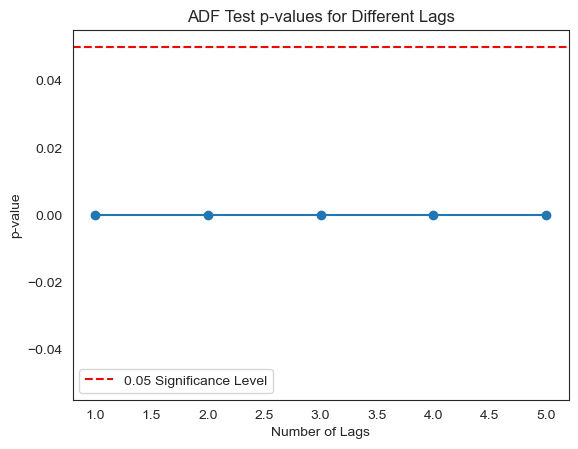

In [134]:
from statsmodels.tsa.stattools import adfuller


# Function to perform ADF test
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    return result[1]

# Check stationarity without lag
print('ADF Test without lag:')
adf_test(filtered_df['close'])

# Create differenced series for different lags and test stationarity
max_lag = 5
p_values = []
for lag in range(1, max_lag + 1):
    filtered_df[f'close_diff_{lag}'] = filtered_df['close'].diff(lag)
    p_value = adf_test(filtered_df[f'close_diff_{lag}'].dropna())
    p_values.append((lag, p_value))

# Find the minimum number of lags that make the series stationary
for lag, p_value in p_values:
    if p_value < 0.05:
        print(f'The series becomes stationary with {lag} lag(s).')
        break
else:
    print('The series does not become stationary with up to 5 lags.')

# Plotting p-values for different lags
lags, p_values = zip(*p_values)
plt.plot(lags, p_values, marker='o')
plt.axhline(y=0.05, color='r', linestyle='--', label='0.05 Significance Level')
plt.xlabel('Number of Lags')
plt.ylabel('p-value')
plt.title('ADF Test p-values for Different Lags')
plt.legend()
plt.show()



<Figure size 1200x600 with 0 Axes>

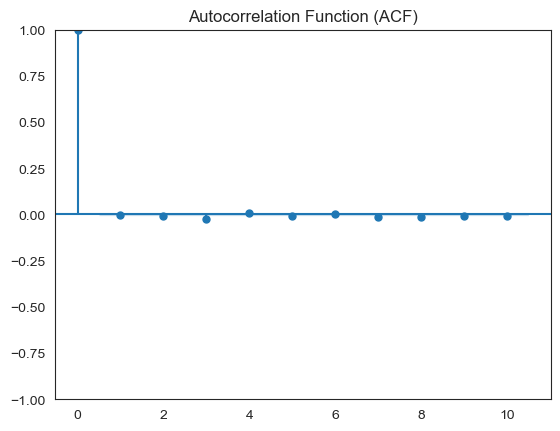

In [135]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(filtered_df['close_diff_1'].dropna(), lags=10, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.show()

It seems that to make the closing price stationary all we need to do is take the first difference. The other differences might prove to be useful later though so until features are selected they can stay in.

In [122]:
filtered_df.isna().sum().sum()

55

In [123]:
filtered_df.isna().sum()

close             0
high              0
low               0
open              0
vwap              0
                 ..
close_diff_6      6
close_diff_7      7
close_diff_8      8
close_diff_9      9
close_diff_10    10
Length: 174, dtype: int64

In [124]:
filtered_df = filtered_df.dropna(subset = ['close_diff_1','close_diff_2','close_diff_3','close_diff_4','close_diff_5','close_diff_6','close_diff_7', 'close_diff_8','close_diff_9','close_diff_10'])

In [125]:
filtered_df.isna().sum()

close            0
high             0
low              0
open             0
vwap             0
                ..
close_diff_6     0
close_diff_7     0
close_diff_8     0
close_diff_9     0
close_diff_10    0
Length: 174, dtype: int64

-----------------------------------
### Discretizing the close column

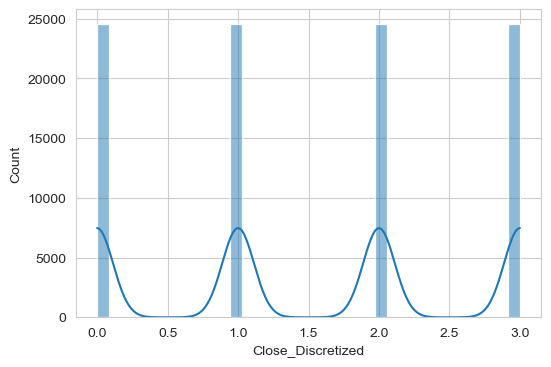

In [126]:
from sklearn.preprocessing import KBinsDiscretizer, Binarizer
from sklearn.impute import SimpleImputer


discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
filtered_df['Close_Discretized'] = discretizer.fit_transform(filtered_df[['close']])

# Quick check to ensure it worked
plt.figure(figsize = (6,4))
sns.histplot(filtered_df['Close_Discretized'] ,kde=True)
plt.show()

------------------------------------------------------------
### Target Creation
 * The target will be a multiclass direction variable with a performance window of 60 minutes with the following classes:
   - 0: Stock is neutral during the performance window.
   - 1: Stock is going up within the performance window
   - 2: Stock is going down within the performance window
 * 60 minutes is chosen as the best window of time because it has enough variance to add data points to each class but also represents a good window of time where there may not be a vast amount of variance in between.

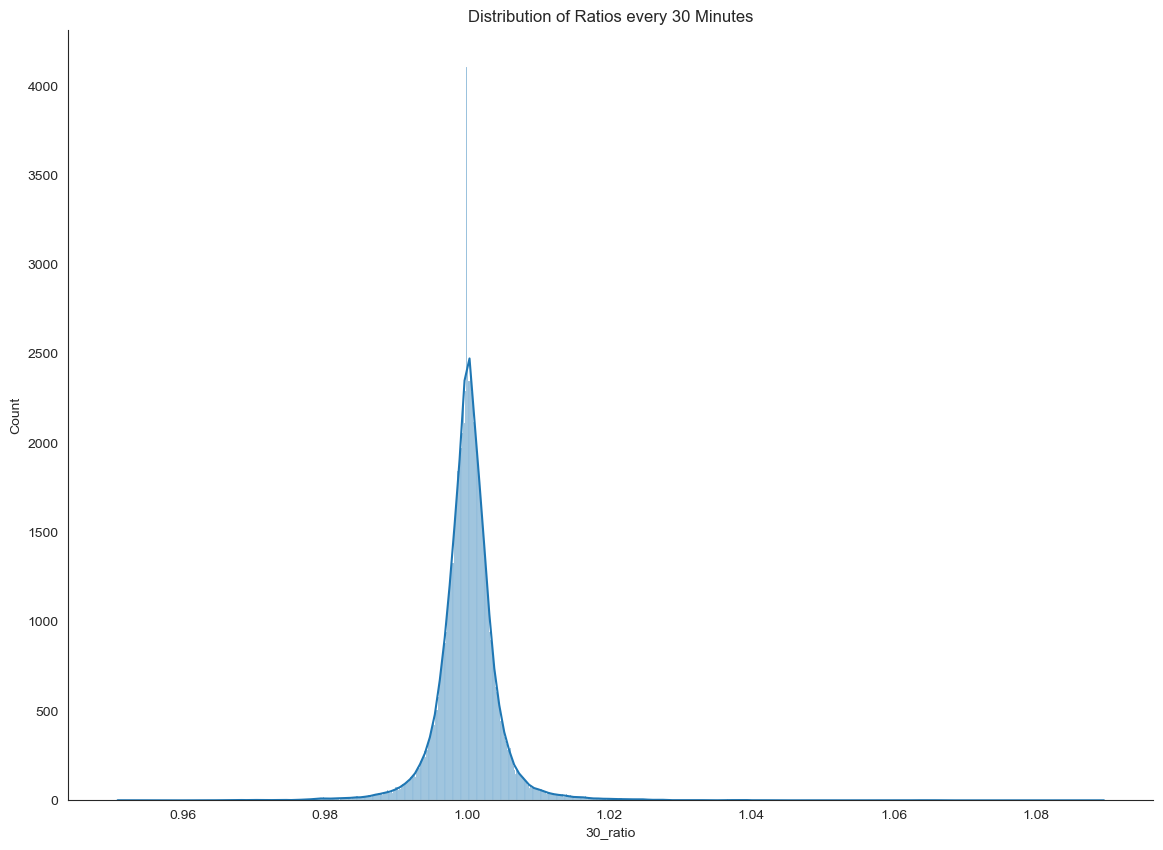

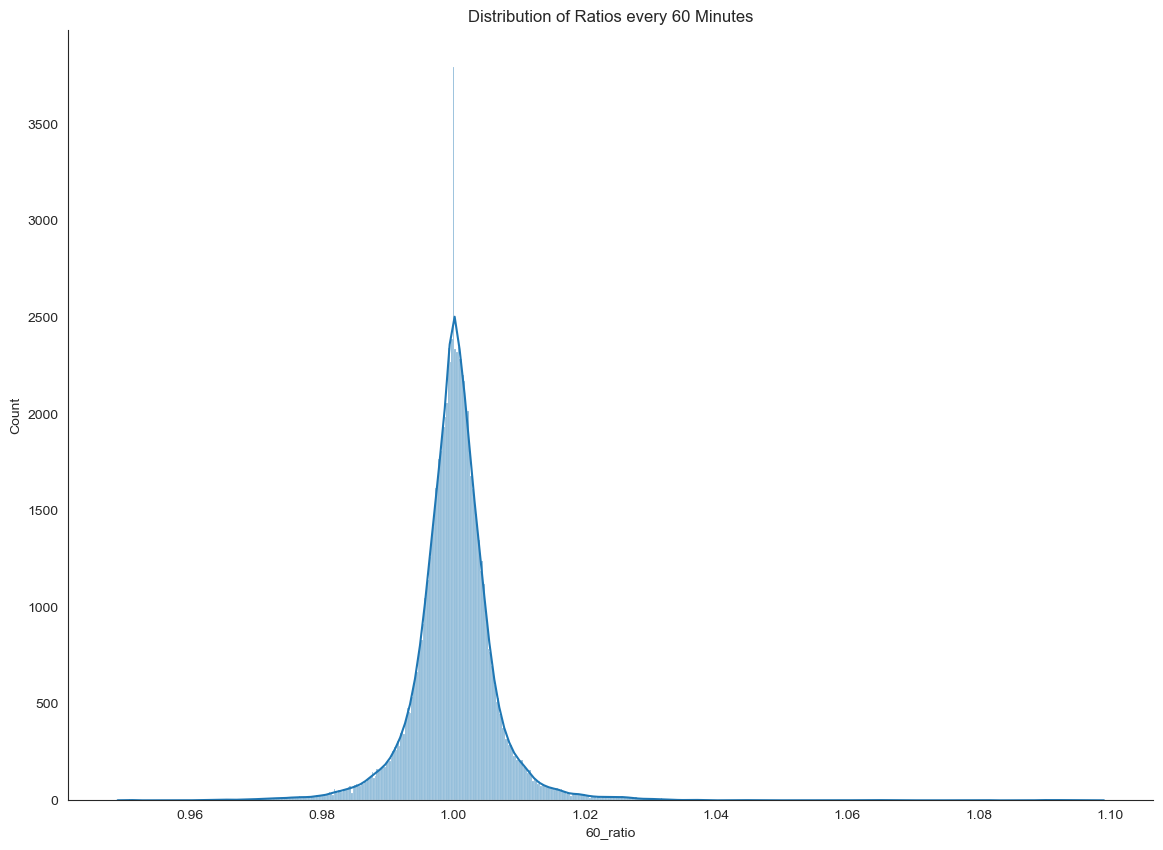

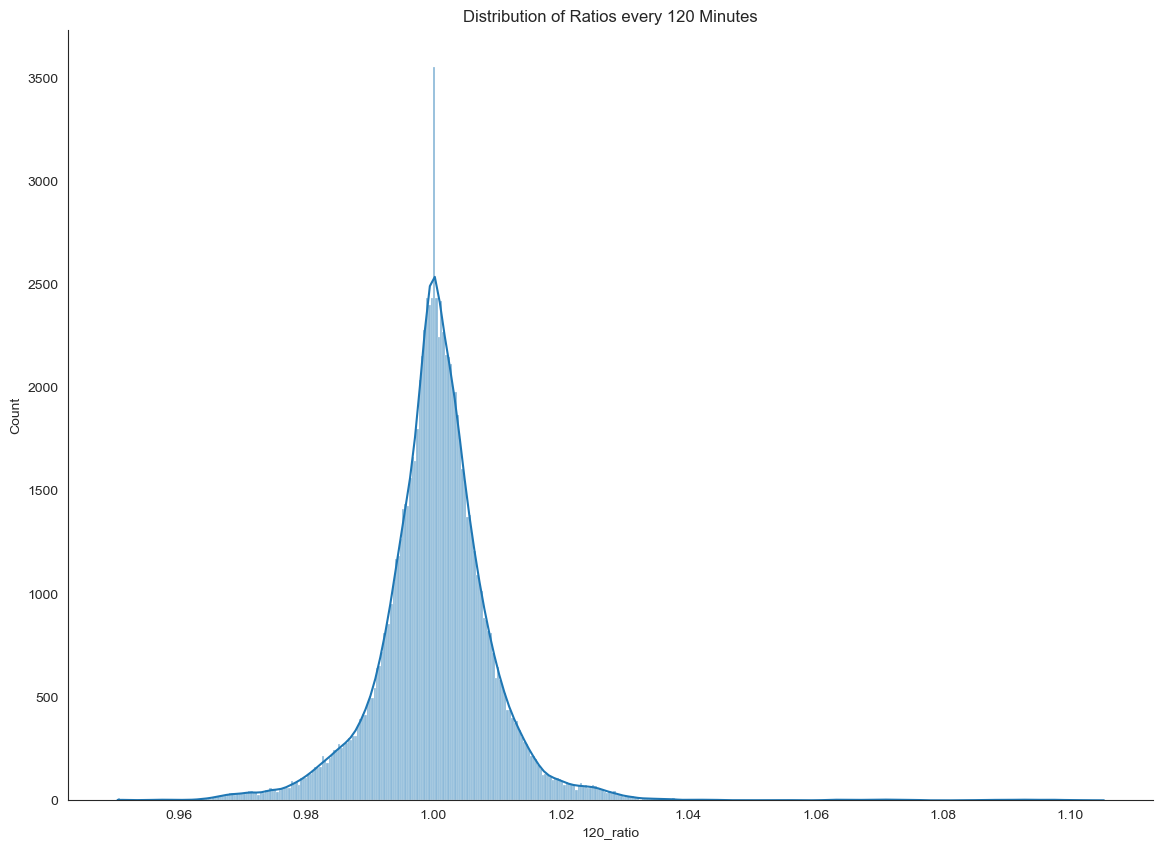

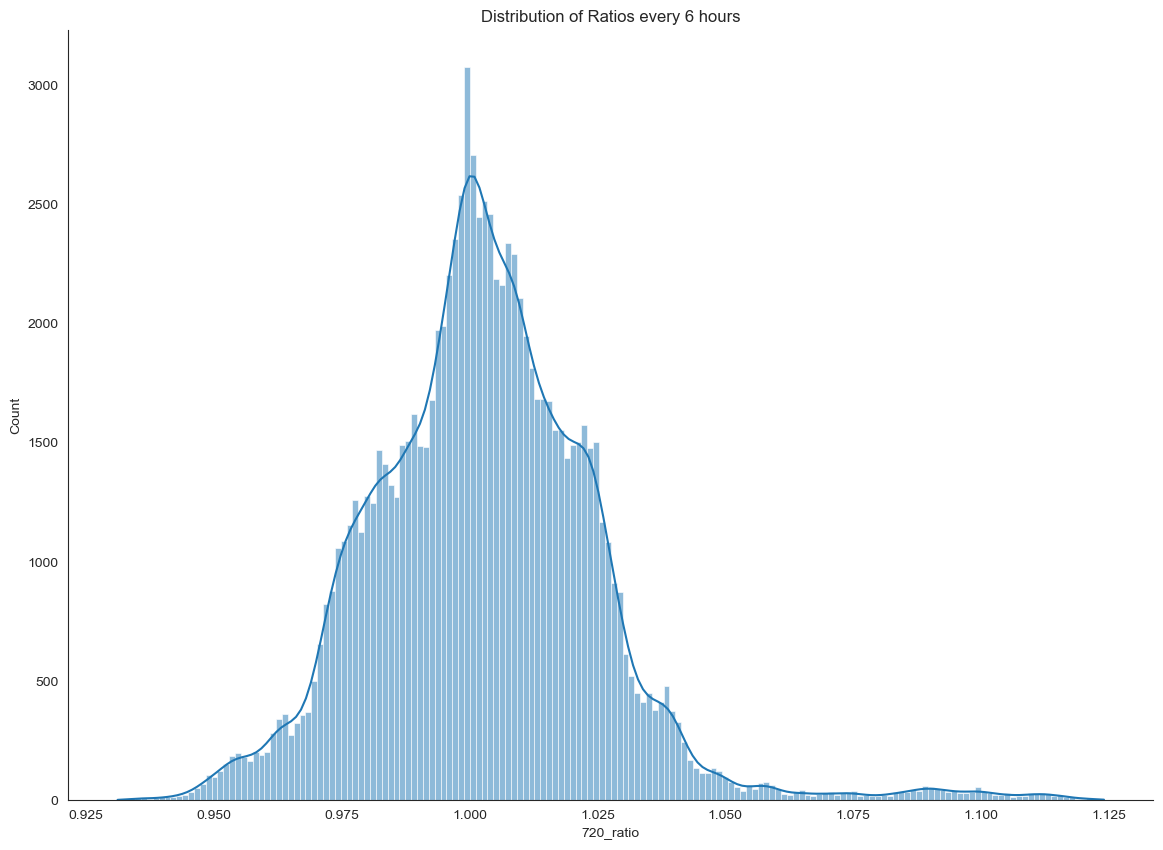

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

plt.figure(figsize=(14, 10))
sns.histplot(filtered_df['30_ratio'], kde=True)
plt.title('Distribution of Ratios every 30 Minutes')
sns.despine()
plt.show()

plt.figure(figsize=(14, 10))
sns.histplot(filtered_df['60_ratio'], kde=True)
plt.title('Distribution of Ratios every 60 Minutes')
sns.despine()
plt.show()

plt.figure(figsize=(14, 10))
sns.histplot(filtered_df['120_ratio'], kde=True)
plt.title('Distribution of Ratios every 120 Minutes')
sns.despine()
plt.show()

plt.figure(figsize=(14, 10))
sns.histplot(filtered_df['720_ratio'], kde=True)
plt.title('Distribution of Ratios every 6 hours')
sns.despine()
plt.show()


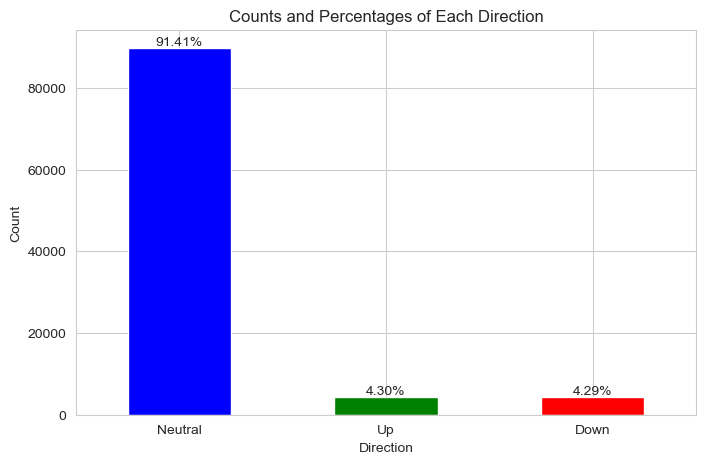

In [127]:
# Determining class counts
def categorize_direction(value):
    if value > 1.01:
        return 1  # Up
    elif 0.99 <= value <= 1.01:
        return 0  # Neutral
    else:
        return 2  # Down

# Apply the function to create the 'Direction' column
filtered_df['Direction'] = filtered_df['60_ratio'].apply(categorize_direction)

filtered_df['Direction'].dropna()

direction_counts = filtered_df['Direction'].value_counts().sort_index()

# Calculate the percentage of each group
direction_percentages = (direction_counts / direction_counts.sum()) * 100

# Plot the counts
plt.figure(figsize=(8, 5))
bars = direction_counts.plot(kind='bar', color=['blue', 'green', 'red'])

# Add percentage labels on top of the bars
for bar, percentage in zip(bars.patches, direction_percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{percentage:.2f}%',
        ha='center',
        va='bottom'
    )

plt.title('Counts and Percentages of Each Direction')
plt.xlabel('Direction')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Neutral', 'Up', 'Down'], rotation=0)
plt.show()


In [128]:
direction_counts.head()

Direction
0    89717
1     4219
2     4214
Name: count, dtype: int64

In [131]:
from sklearn.feature_selection import mutual_info_classif
X = filtered_df.drop(columns=['Direction'])
y = filtered_df['Direction']

mi = mutual_info_classif(X, y)

# Create a DataFrame to display the mutual information scores
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi
}).sort_values(by='Mutual Information', ascending=False)

# Display the mutual information scores
htmldf(mi_df)

,Feature,Mutual Information
111,60_ratio,0.352550
68,TOS_STDEVALL_L_2,0.312939
65,TOS_STDEVALL_LR,0.312870
66,TOS_STDEVALL_L_1,0.312769
70,TOS_STDEVALL_L_3,0.312740
71,TOS_STDEVALL_U_3,0.312697
67,TOS_STDEVALL_U_1,0.312696
69,TOS_STDEVALL_U_2,0.312462
53,SUPERTl_7_3.0,0.199556
54,SUPERTs_7_3.0,0.194796
